#  <font color = orange> <font size = 8>  **Análise das Eleições Municipais de 2020 do Estado de São Paulo - Desafio Técnico**

---

<center><img alt="Logo anp" width="30%" src="./img/banner.jpg"></center>

## **1. Objetivo do relatório** 🎯

Este projeto tem como objetivo realizar uma análise exploratória nas bases de dados fornecidas, assim como também realizar o tratamento desses dados e por fim realizar consultas trazendo insights importantes para futuras tomadas de decisões. 

Os pontos a serem trazidos neste relatório são:
- Em qual município o candidato X foi mais votado;
- Qual candidato foi mais votado em cada município;
- Qual perfil do eleitorado (faixa etária, gênero, grau de escolaridade, etc.) mais votou em cada candidato.

##### **1.1. Sobre os dados utilizados**

Os dados fornecidos para a execução desse relatório são bases de dados do Perfil do Eeitorado e os resultados das urnas de São Paulo 1° turno, ambos do ano de 2020. A análise será apenas do Estado de São Paulo e seus Municípios.

---


## **2. Coleta dos dados** 🎲

Para podermos iniciar nossos trabalhos, iremos coletar os dados necessários e fornecidos para a execução deste relatório.


##### **2.1. Importação das bibliotecas que serão utilizadas**

In [304]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings

# Utilizando a biblioteca warnings para retirar avisos da execução do código para uma visualização mais limpa.
warnings.filterwarnings('ignore')

# Mostrando versões utilizadas dos pacotes:
print('Pacotes Prontos! Versões Utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy     --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
print(f'Seaborn  --> {sns.__version__}')


Pacotes Prontos! Versões Utilizadas:

Pandas      --> 1.5.3
Numpy     --> 1.24.3
Matplotlib  --> 3.7.1
Seaborn  --> 0.12.2


##### **2.2. Coleta dos dados necessários para análise**

Agora iremos coletar os dados que serão ultilizados fazendo a leitura dos arquivos .csv que estão disponíveis na pasta "csv" no repositório deste projeto.

In [2]:
#Coleta do perfil do eleitorado já os transformando em DataFrame
eleitorado = pd.read_csv('./csv/perfil_eleitorado_2020.csv', encoding='ISO-8859-1', sep=(';'))
#Coleta dos resultados já os transformando em DataFrame
resultados = pd.read_csv('./csv/SP_turno_1.csv', encoding='ISO-8859-1', sep=(';'))

---

## **3. Análise exploratória** 🔍

Com os dados carregados iremos ter nosso primeiro contato com eles, compreendendo suas características que o definem e sua estrutura. Vamos fazer esta etapa por partes, explorando **primeiro o DataSet do <u>Perfil do Eleitorado</u> e logo em seguida vamos explorar o <u>DataSet de Resultados</u>.**

### **3.1. Perfil do Eleitorado**

- **<u>Dimensão do DataSet e primeira visualização<u>**

In [3]:
#Verificando 5 primeiras linhas do DataSet
eleitorado.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,47,37,1,0
1,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,4,ENSINO FUNDAMENTAL COMPLETO,5,4,0,0
2,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0
3,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,6,ENSINO MÉDIO COMPLETO,10,8,0,0
4,01/08/2020,08:37:48,2020,SP,70734,SÃO BENTO DO SAPUCAÍ,0,Sem biometria,314,4,...,3,CASADO,7074,70 a 74 anos,8,SUPERIOR COMPLETO,23,18,0,0


In [4]:
#Verificando os 5 últimos registros do DataSet
eleitorado.tail()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
4248502,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,4549,45 a 49 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,7,7,0,0
4248503,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,4549,45 a 49 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,1,0,0
4248504,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,4549,45 a 49 anos,6,ENSINO MÉDIO COMPLETO,5,5,0,0
4248505,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,4549,45 a 49 anos,8,SUPERIOR COMPLETO,2,2,0,0
4248506,01/08/2020,08:37:48,2020,PR,74349,FLOR DA SERRA DO SUL,0,Sem biometria,140,4,...,9,DIVORCIADO,5054,50 a 54 anos,2,LÊ E ESCREVE,1,1,0,0


In [5]:
eleitorado.shape

(4248507, 21)

Na primeira visualização dos nosso dados, podemos ter uma noção de forma mais geral sobre o que se trata nosso DataSet. São dados onde contém registros de vários perfis de eleitores de todo o Brasil, onde por exemplo podemos ver o seu estado civil, sua faixa etaria a qual pertence e o grau escola. E também como podemos verificar nosso DataSet contém **4.248.507 linhas/registros** por **21 colunas/variáveis**, ou seja, temos conosco mais de 4 milhões de perfis de eleitores.

- **<u>Verificando colunas / Dicionário de Variáveis<u>**

In [6]:
eleitorado.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRIA', 'DS_MUN_SIT_BIOMETRIA',
       'NR_ZONA', 'CD_GENERO', 'DS_GENERO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA',
       'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL',
       'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_DEFICIENCIA',
       'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

Ao verificar as 21 colunas do DataSet, podemos fazer um dicionário para dar um significado mais amplo para elas e então compreender melhor cada váriavel.

* `DT_GERACAO` - Data da extração dos dados para geração do arquivo.
* `HH_GERACAO` - Hora da extração dos dados para geração do arquivo.
* `ANO_ELEICAO` - Ano de referência da eleição para geração do arquivo. 
* `SG_UF` - Sigla da Unidade da Federação.
* `CD_MUNICIPIO` - Código do município do domicílio eleitoral do eleitor.
* `NM_MUNICIPIO` - Nome do município do domicílio eleitoral do eleitor.
* `CD_MUN_SIT_BIOMETRIA` - Código da situação biométrica do município.
* `DS_MUN_SIT_BIOMETRIA` - Descrição da situação biométrica do município.
* `NR_ZONA` - Número da zona eleitoral onde ocorreu a eleição.
* `CD_GENERO` - Código do gênero do eleitor.
* `DS_GENERO` - Gênero do eleitor.
* `CD_ESTADO_CIVIL` - Código do estado civil do eleitor.
* `DS_ESTADO_CIVIL` - Estado civil do eleitor de acordo.
* `CD_FAIXA_ETARIA` - Código da faixa etária a qual pertence o eleitor. 
* `DS_FAIXA_ETARIA` - Faixa etária a qual pertence o eleitor.
* `CD_GRAU_ESCOLARIDADE` - Código do grau de escolaridade do eleitor.
* `DS_GRAU_ESCOLARIDADE` - Grau de escolaridade do eleitor.
* `QT_ELEITORES_PERFIL` - Quantidade de eleitores.
* `QT_ELEITORES_BIOMETRIA` - Quantidade de eleitores com biometria.
* `QT_ELEITORES_DEFICIENCIA` - Quantidade de eleitores com deficiência.
* `QT_ELEITORES_INC_NM_SOCIAL` - Quantidade de eleitores com nome social.


In [7]:
estado_civil_eleitorado = eleitorado['DS_ESTADO_CIVIL'].value_counts()
genero_eleitorado = eleitorado['DS_GENERO'].value_counts()
escolaridade_eleitorado = eleitorado['DS_GRAU_ESCOLARIDADE'].value_counts()
faixa_etaria_eleitorado = eleitorado['DS_FAIXA_ETARIA'].value_counts()



- **<u>Checando os tipos de dados</u>**

Ao compreender o que significa cada coluna/váriavel, podemos verificar quais os tipos de dados que compõem cada uma delas.

In [8]:
#Verificar tipos de dados
eleitorado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248507 entries, 0 to 4248506
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

Ao verificar os tipos de dados do nosso DataSet, podemos perceber que há um pequeno problema: As colunas **DT_GERACAO** e **HH_GERACAO** que deveriam estar em formato de data e hora, estão do tipo "object", o que dificultaria certas análises com esses dados. Mas para essa análise em específico, não nos trará problema, pois com os objetivos apresentados não usaremos essas váriaveis.

- **<u>Checando Valores Únicos</u>**

In [9]:
#Verificar valores unicos
eleitorado.nunique()

DT_GERACAO                       1
HH_GERACAO                       1
ANO_ELEICAO                      1
SG_UF                           26
CD_MUNICIPIO                  5569
NM_MUNICIPIO                  5296
CD_MUN_SIT_BIOMETRIA             1
DS_MUN_SIT_BIOMETRIA             1
NR_ZONA                        421
CD_GENERO                        3
DS_GENERO                        3
CD_ESTADO_CIVIL                  6
DS_ESTADO_CIVIL                  6
CD_FAIXA_ETARIA                 23
DS_FAIXA_ETARIA                 23
CD_GRAU_ESCOLARIDADE             9
DS_GRAU_ESCOLARIDADE             9
QT_ELEITORES_PERFIL           2953
QT_ELEITORES_BIOMETRIA        2658
QT_ELEITORES_DEFICIENCIA       173
QT_ELEITORES_INC_NM_SOCIAL       8
dtype: int64

Observando os valores únicos do DataSet de Perfil do Eleitorado, podemos perceber que há alguma colunas com apenas um tipo de dado ou valor, ou seja, são colunas que podemos retirar do nosso DataFrame pois não agregaria na nossa análise em específico. Algo interessante é que temos **2.953 perfis diferentes de eleitores**.

- **<u>Checando valores nulos</u>**

Para checar os valores nulos deste banco de dados, precisamos estar ciente das seguintes regras:

1. Campos preenchidos com **#NULO** são campos em branco no banco de dados. Para colunas númericas os campos nulos refere-se por **-1**.

2. Campos com **#NE** significam que naquele ano a informação não era registrada em banco de dados pelos sistemas eleitorais. Para colunas númericas os campos nulos refere-se por **-3**.

In [10]:
#Guardando no DataSet campos que tenham #NULO, #NE, -1 ou -3
valores_nulos_eleitorado = (eleitorado == '#NULO').sum()
valores_nulos_eleitorado_ne = (eleitorado == '#NE').sum()
valores_nulos_numericos_eleitorado = (eleitorado == -1).sum()
valores_nulos_numericos_eleitorado_ne = (eleitorado == -3).sum()
eleitorado_isnull = eleitorado.isnull().sum() #Procura por algum valor NaN ou Nulo e valores padrão do pandas

#Criando um DataFrame para uma melhor exibição das colunas que tenham valores nulos 
df_valores_nulos_eleitorado = pd.DataFrame({
    '#NULO': valores_nulos_eleitorado,
    '#NE': valores_nulos_eleitorado_ne,
    '-1': valores_nulos_numericos_eleitorado,
    '-3': valores_nulos_numericos_eleitorado_ne,
    'isnull': eleitorado_isnull,
})

# Filtrar apenas as linhas com pelo menos um valor nulo
valores_nulos_filtro_eleitorado = df_valores_nulos_eleitorado[
    (df_valores_nulos_eleitorado['#NULO'] > 0) |
    (df_valores_nulos_eleitorado['#NE'] > 0) |
    (df_valores_nulos_eleitorado['-1'] > 0) |
    (df_valores_nulos_eleitorado['-3'] > 0) |
    (df_valores_nulos_eleitorado['isnull'] > 0) 
]

# Calcular o total de linhas no DataFrame original
total_linhas = len(eleitorado)

# Somar a contagem de todos os tipos de valores nulos
total_valores_nulos_eleitorado = valores_nulos_filtro_eleitorado['#NULO'] + valores_nulos_filtro_eleitorado['#NE'] + valores_nulos_filtro_eleitorado['-1'] + valores_nulos_filtro_eleitorado['-3'] + valores_nulos_filtro_eleitorado['isnull']

# Calcular a porcentagem total de valores nulos em relação ao total de linhas
valores_nulos_filtro_eleitorado['% total'] = (total_valores_nulos_eleitorado / total_linhas) * 100

#renomeia a coluna das variaveis
valores_nulos_filtro_eleitorado.rename_axis('Coluna/Váriavel', axis='columns', inplace=True)
valores_nulos_filtro_eleitorado.round(2)


Coluna/Váriavel,#NULO,#NE,-1,-3,isnull,% total
CD_FAIXA_ETARIA,0,0,0,2100,0,0.05


Como podemos constatar na tabela acima, apenas a coluna **"CD_FAIXA_ETARIA"** tem campos **#NE**, ou seja, em 2100 linhas/registros (0.05%) nesse ano de 2020 essa informação, não foi registrado pelos sistemas eleitorais. Não precisaremos tratar esses campos nulos, pois essa coluna é apenas um código da faixa etaria a qual pertence o eleitor, portanto é uma coluna ínutil para nossa análise.

- **<u>Checando Outliers</u>**

Será que é interessante buscar outliers com esses tipos de dados? Veremos abaixo.

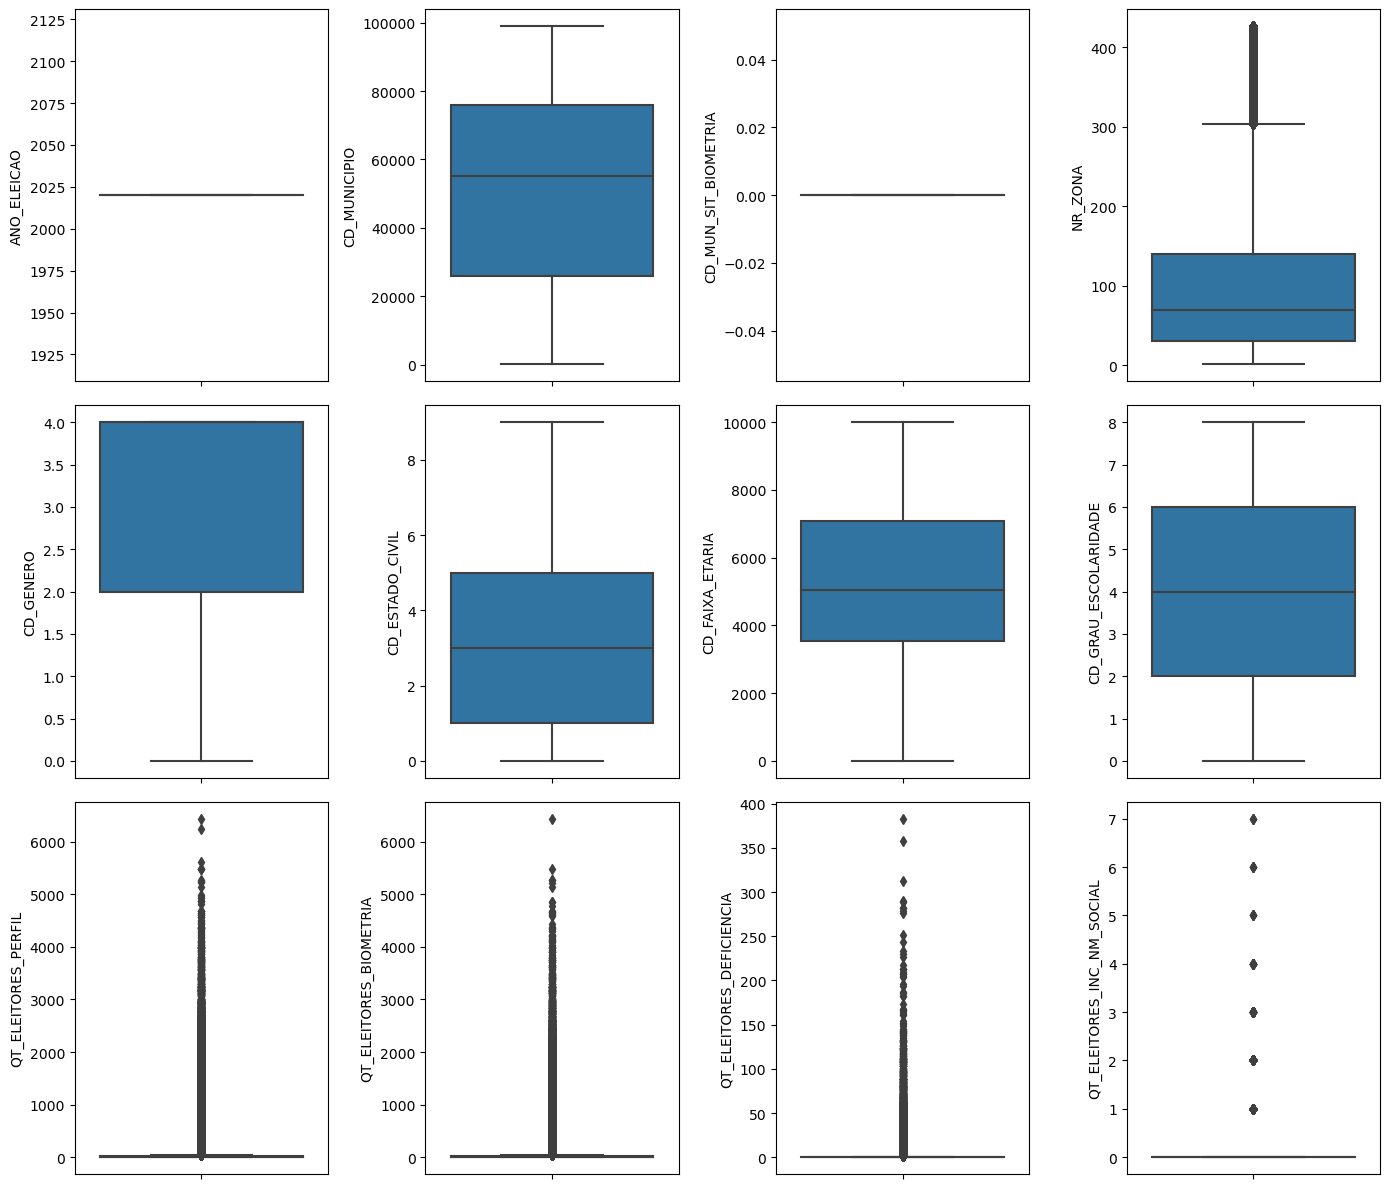

In [12]:
#Este loop percorre as colunas do DataSet verificando se tal váriavel é númerica, caso sim, é adicionado na lista
variaveis_numericas = []
for i in eleitorado.columns[0:21].tolist():
        if eleitorado.dtypes[i] == 'int64' or eleitorado.dtypes[i] == 'float64':            
            # print(i, ':' , eleitorado.dtypes[i]) 
            variaveis_numericas.append(i)
  
#Criando gráfico
plt.rcParams["figure.figsize"] = [14.00, 12.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 4)

linha = 0
coluna = 0
#Este loop percorre a lista da colunas númericas e plota um gráfico para cada váriavel
for i in variaveis_numericas:
    sns.boxplot(data = eleitorado, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

Estudando as análises descritivas no DataFrame acima e pelo gráfico boxplot, podemos perceber que essa análise de outliers não oportunidades de análises, pois as váriaveis númericas deste DataSet em especial, são apenas códigos ou valores muito específicos, ou seja, não devemos levar em consideração esses outliers, pois essas colunas servem apenas para identificação, ou mostrar a quantidade de eleitores.

### **3.1. Resultados da eleição**

- **<u>Dimensão do DataSet e primeira visualização<u>**

In [13]:
#Verificando 5 primeiras linhas do DataSet
resultados.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
1,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
2,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
3,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1
4,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,E0BA7264,03/11/2020 11:19:00,11 - 1,#NULO#,15/11/2020 07:00:00,15/11/2020 17:02:46,0,15/11/2020 17:04:06,-1,-1


In [14]:
#Verificando 5 últimas linhas do DataSet
resultados.tail()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
9433995,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,36C93684,08/11/2020 12:08:00,13 - 73,#NULO#,15/11/2020 07:00:00,15/11/2020 17:03:43,0,15/11/2020 17:05:03,-1,-1
9433996,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,36C93684,08/11/2020 12:08:00,13 - 73,#NULO#,15/11/2020 07:00:00,15/11/2020 17:03:43,0,15/11/2020 17:05:03,-1,-1
9433997,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,36C93684,08/11/2020 12:08:00,13 - 73,#NULO#,15/11/2020 07:00:00,15/11/2020 17:03:43,0,15/11/2020 17:05:03,-1,-1
9433998,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,36C93684,08/11/2020 12:08:00,13 - 73,#NULO#,15/11/2020 07:00:00,15/11/2020 17:03:43,0,15/11/2020 17:05:03,-1,-1
9433999,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,...,36C93684,08/11/2020 12:08:00,13 - 73,#NULO#,15/11/2020 07:00:00,15/11/2020 17:03:43,0,15/11/2020 17:05:03,-1,-1


In [15]:
#Verificando dimensão 
resultados.shape

(9434000, 45)

Observando de forma geral nosso DataSet acima, vemos que dessa vez temos dados dos resultados das eleições municipais de 2020 de São Paulo, onde podemos perceber que já existe uma coluna com valores nulos. E também como podemos verificar nosso DataSet contém **9.434.000 linhas/registros** por **45 colunas/variáveis**. Algo que também deve sr observado é que na coluna **DS_AGREGADAS** temos um outro tipo de valor nulo que não estavamos ciente, trata-se do valor **#NULO#**, o que é diferente do que já tinhamos mencionado **#NULO** (com apenas uma "#").

- **<u>Verificando colunas / Dicionário de Variáveis<u>**

In [16]:
resultados.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEITORES_BIOMETRIA_NH', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA'],
      dtype='object')

Ao verificar as **45 colunas** do DataSet, podemos fazer um dicionário para dar um significado mais amplo para elas e então compreender melhor cada váriavel.

* `DT_GERACAO` - Data da extração dos dados para geração do arquivo.
* `HH_GERACAO` - Hora da extração dos dados para geração do arquivo.
* `ANO_ELEICAO` - Ano de referência da eleição para geração do arquivo. 
* `CD_TIPO_ELEICAO` - Código do tipo de eleição.
* `NM_TIPO_ELEICAO` - Nome do tipo de eleição
* `CD_PLEITO` - Código do pleito é uma informação de eleições em uma determinada data.
* `DT_PLEITO` - Data em que ocorreu a eleição (pleito).
* `NR_TURNO` - Número do turno da eleição.
* `CD_ELEICAO` - Código único da eleição no âmbito da Justiça Eleitoral.
* `DS_ELEICAO` - Descrição da eleição.
* `SG_UF` - Sigla da Unidade da Federação.
* `CD_MUNICIPIO` - Código do município do domicílio eleitoral do eleitor.
* `NM_MUNICIPIO` - Nome do município do domicílio eleitoral do eleitor.
* `NR_ZONA` - Número da zona eleitoral onde ocorreu a eleição.
* `NR_SECAO` - Número da seção em que ocorreu a eleição.
* `NR_LOCAO_VOTACAO` - Número do local de votação da eleitora ou eleitor.
* `CD_CARGO_PERGUNTA` - Código do cargo do candidato ou pergunta, no caso de plebiscito.
* `DS_CARGO_PERGUNTA` - Descrição do cargo do candidato ou pergunta, no caso de plebiscito.
* `NR_PARTIDO` - Número do partido de origem da candidata ou candidato.
* `SG_PARTIDO` - Sigla do partido de origem da candidata ou candidato. 
* `NM_PARTIDO` - Nome do partido de origem da candidata ou candidato.
* `DT_BU_RECEBIDO` - Data do boletim de urna recebido.
* `QT_APTOS` - Quantidade de eleitoras e eleitores aptos a votar naquele município, zona e seção.
* `QT_COMPARECIMENTO` - Quantidade de eleitoras e eleitores que compareceram às eleições naquele município, zona e seção.
* `QT_ABSTENCOES` - Quantidade de eleitoras e eleitores aptos que não compareceram às eleições naquele município, zona e seção.
* `CD_TIPO_URNA` - Código de identificação do tipo de urna.
* `DS_TIPO_URNA` - Descrição de identificação do tipo de urna.
* `CD_TIPO_VOTAVEL` - Código do tipo de votável.
* `DS_TIPO_VOTAVEL` - Descrição do tipo votavel.
* `NR_VOTAVEL` - Número do votável.
    - Número do candidato (quando voto nominal)
    - Número do partido (quando voto em legenda)
    - Número 95 (quando voto em branco)
    - Número 96 (quando voto nulo)
    - Número 97 (quando voto anulado e apurado em separado)
    - Número 98(quando voto anulado)
* `NM_VOTAVEL` - Nome do votável.
    - Nome do candidato (quando voto nominal ou voto anulado)
    - Nome do partido (quando voto em legenda)
    - Branco (quando voto em branco)
    - Nulo (quando voto nulo)
* `QT_VOTOS` - Quantidade de votos recebidos pelo votável naquele município, zona e seção.
* `NR_URNA_EFETIVADA` - Número da urna efetivada.
* `CD_CARGA_1_URNA_EFETIVADA` - Código da carga 1 de urna efetivada.
* `CD_CARGA_2_URNA_EFETIVADA` - Código da carga 2 da urna efetivada
* `CD_FLASHCARD_URNA_EFETIVADA` - Código do flashcard de urna efetivada
* `DT_CARGA_URNA_EFETIVADA` - Data da carga da urna efetivada.
* `DS_CARGO_PERGUNTA_SECAO` - Informação de código cargo pergunta e seção. 
* `DS_AGREGADAS` - Lista das seções agregadas.
* `DT_ABERTURA` - Data/hora de abertura da urna eletrônica para votação.
* `DT_ENCERRAMENTO` - Data/hora de encerramento da urna eletrônica para votação.
* `QT_ELEITORES_BIOMETRIA_NH` - Quantitativo de eleitores com biometria, mas que não foram habilitados por meio dela.
* `DT_EMISSAO_BU` - Data/hora de emissão do boletim de urna (BU).
* `NR_JUNTA_APURADORA` - Número da junta apuradora.
* `NR_TURMA_APURADORA` - Número da turma apuradora.



- **<u>Checando os tipos de dados</u>**

Ao compreender o que significa cada coluna/váriavel, podemos verificar quais os tipos de dados que compõem cada uma delas.

In [17]:
resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9434000 entries, 0 to 9433999
Data columns (total 45 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   DT_GERACAO                   object 
 1   HH_GERACAO                   object 
 2   ANO_ELEICAO                  int64  
 3   CD_TIPO_ELEICAO              int64  
 4   NM_TIPO_ELEICAO              object 
 5   CD_PLEITO                    int64  
 6   DT_PLEITO                    object 
 7   NR_TURNO                     int64  
 8   CD_ELEICAO                   int64  
 9   DS_ELEICAO                   object 
 10  SG_UF                        object 
 11  CD_MUNICIPIO                 int64  
 12  NM_MUNICIPIO                 object 
 13  NR_ZONA                      int64  
 14  NR_SECAO                     int64  
 15  NR_LOCAL_VOTACAO             int64  
 16  CD_CARGO_PERGUNTA            int64  
 17  DS_CARGO_PERGUNTA            object 
 18  NR_PARTIDO                   int64  
 19  

Como podemos observar, os tipos de dados predominantes são do tipo número inteiro e objeto (palavras ou letras) apenas uma váriavel com dados do tipo número flutuante. Podemos observar que assim como no outro DataSet de perfil do eleitorado que exploramos, também as colunas **DT_GERACAO** e **HH_GERACAO** estão do tipo object. Mas como já mencionado, nesta análise não usaremos tais váriaveis e logo mais na parte de tratamento faremos a exclusão dessas colunas.

- **<u>Checando Valores Únicos</u>**

In [18]:
resultados.nunique()

DT_GERACAO                         1
HH_GERACAO                         1
ANO_ELEICAO                        1
CD_TIPO_ELEICAO                    1
NM_TIPO_ELEICAO                    1
CD_PLEITO                          1
DT_PLEITO                          1
NR_TURNO                           1
CD_ELEICAO                         1
DS_ELEICAO                         1
SG_UF                              1
CD_MUNICIPIO                     645
NM_MUNICIPIO                     645
NR_ZONA                          393
NR_SECAO                        1017
NR_LOCAL_VOTACAO                 166
CD_CARGO_PERGUNTA                  2
DS_CARGO_PERGUNTA                  2
NR_PARTIDO                        34
SG_PARTIDO                        34
NM_PARTIDO                        34
DT_BU_RECEBIDO                 13799
QT_APTOS                         461
QT_COMPARECIMENTO                399
QT_ABSTENCOES                    250
CD_TIPO_URNA                       1
DS_TIPO_URNA                       1
C

Verificando os valores únicos, já podemos perceber algumas informações: 

- Podemos confirmar os **645 municípios** existentes no estado de São Paulo. [*Fonte*](https://g1.globo.com/sp/sao-paulo/noticia/2023/06/28/censo-do-ibge-confira-populacao-atualizada-dos-municipios-de-sp.ghtml)
- Podemos ver que existem **34 partidos políticos**, mas segundo o [TSE](https://www.tse.jus.br/partidos/partidos-registrados-no-tse) o Brasil possui apenas **30 partidos**, o que pode haver alguns dados nulos nessa váriavel.


- **<u>Checando valores nulos</u>**

Agora para checar os valores nulos do DataSet de resultados, também precisamos levar em consideração as regras já mecionadas:

1. Campos preenchidos com **#NULO** são campos em branco no banco de dados. Para colunas númericas os campos nulos refere-se por **-1**.

2. Campos com **#NE** significam que naquele ano a informação não era registrada em banco de dados pelos sistemas eleitorais. Para colunas númericas os campos nulos refere-se por **-3**.

In [19]:
#Guardando no DataSet campos que tenham #NULO, #NE, -1 ou -3
valores_nulos_resultados = (resultados == '#NULO').sum()
valores_nulos_resultados_ne = (resultados == '#NE').sum()
valores_nulos_numericos_resultados = (resultados == -1).sum()
valores_nulos_numericos_resultados_ne = (resultados == -3).sum()
resultados_isnull = resultados.isnull().sum() #retorna valores nulos padrao do pandas
nulo = (resultados == '#NULO#').sum()

#Criando um DataFrame para uma melhor exibição das colunas que tenham valores nulos 
df_valores_nulos_resultados = pd.DataFrame({
    '#NULO': valores_nulos_resultados,
    '#NE': valores_nulos_resultados_ne,
    '-1': valores_nulos_numericos_resultados,
    '-3': valores_nulos_numericos_resultados_ne,
    'isnull': resultados_isnull,
    '#NULO#': nulo
})

# Filtrar apenas as linhas com pelo menos um valor nulo
valores_nulos_filtro_resultados = df_valores_nulos_resultados[
    (df_valores_nulos_resultados['#NULO'] > 0) |
    (df_valores_nulos_resultados['#NE'] > 0) |
    (df_valores_nulos_resultados['-1'] > 0) |
    (df_valores_nulos_resultados['-3'] > 0) |
    (df_valores_nulos_resultados['isnull'] > 0) |
    (df_valores_nulos_resultados['#NULO#'] > 0)
]

# Calcular o total de linhas no DataFrame original
total_linhas = len(resultados)

# Somar a contagem de todos os tipos de valores nulos
total_valores_nulos_resultado = valores_nulos_filtro_resultados['#NULO'] + valores_nulos_filtro_resultados['#NE'] + valores_nulos_filtro_resultados['-1'] + valores_nulos_filtro_resultados['-3'] + valores_nulos_filtro_resultados['isnull'] + valores_nulos_filtro_resultados['#NULO#']

# Calcular a porcentagem total de valores nulos em relação ao total de linhas
valores_nulos_filtro_resultados['% total'] = (total_valores_nulos_resultado / total_linhas) * 100

#Renomeando o nome da coluna das váriaveis
valores_nulos_filtro_resultados.rename_axis('Coluna/Váriavel', axis='columns', inplace=True)
valores_nulos_filtro_resultados.round(2)

Coluna/Váriavel,#NULO,#NE,-1,-3,isnull,#NULO#,% total
NR_PARTIDO,0,0,342562,0,0,0,3.63
SG_PARTIDO,0,0,0,0,0,342562,3.63
NM_PARTIDO,0,0,0,0,0,342562,3.63
NM_VOTAVEL,0,0,0,0,13,0,0.00
DS_AGREGADAS,0,0,0,0,0,9209091,97.62
DT_ABERTURA,0,0,0,0,129,0,0.00
DT_ENCERRAMENTO,0,0,0,0,129,0,0.00
NR_JUNTA_APURADORA,0,0,9433871,0,0,0,100.00
NR_TURMA_APURADORA,0,0,9433871,0,0,0,100.00


Agora analisando os valores nulos do DataSet de resultados, podemos logo perceber que se tem mais valores nulos do que o analisado anteriormente. Podemos trazer alguns pontos:

*Os valores #NULO# são um outro padrão para valores nulos que conseguimos identificar no DataSet.*

- As váriaveis **NR_PARTIDO**, **"SG_PARTIDO"** e **"NM_PARTIDO"** tem a mesma quantidade de valores nulos. Eles representam os votos Nulos e Brancos.
- A váriavel **"DS_AGREGADAS"** possui mais de 97% de valores nulos, com essa alta porcentagem decidiremos deletar esta coluna na etapa de tratamento.
- **DT_ABERTURA** e **DT_ENCERRAMENTO** são as datas e horas de abertura e encerramento das urnas, apresentam 129 valores nulos, mas isso não representa nem 0,01%. Portanto iremos ignorar esse nulos, pois não iremos usar essa várial nessa análise.
- **"NR_JUNTA_APURADORA"** e **"NR_TURMA_APURADORA"** tem 100% dos registros com valores númericos nulos. Também irá ser removida na etapa de tratamento.
- Agora a coluna **"NM_VOTAVEL"** exitem 13 valores nulos padrão do Pandas, apesar de ser um número baixissímo de nulos, vamos verificar mais a fundo quais são esse dados nulos.

In [20]:
#Filtrando apenas os valores nulos da coluna NM_VOTAVEL 
resultados[resultados['NM_VOTAVEL'].isnull()][['NM_VOTAVEL', 'NR_VOTAVEL', 'NM_MUNICIPIO', 'QT_VOTOS']]

,NM_VOTAVEL,NR_VOTAVEL,NM_MUNICIPIO,QT_VOTOS
2851460,NaN,19555,TERRA ROXA,3
2851506,NaN,19555,TERRA ROXA,2
2851594,NaN,19555,TERRA ROXA,5
2851696,NaN,19555,TERRA ROXA,1
2851765,NaN,19555,TERRA ROXA,3
2851874,NaN,19555,TERRA ROXA,1
2851937,NaN,19555,TERRA ROXA,1
2851986,NaN,19555,TERRA ROXA,1
2852012,NaN,19555,TERRA ROXA,3
2852147,NaN,19555,TERRA ROXA,2


Trazendo agora apenas os valores nulos da coluna **"NM_VOTAVEL"**, podemos perceber que o número que refere-se a tal candidato é **19555** do município de TERRA ROXA (SP) e com um total de 28 votos. Fazendo uma breve pesquisa temos o nome da candidata a vereadora **[Ana Claudia Tychoniuk](https://www.diariocidade.com/sp/terra-roxa/eleicoes/2020/candidatos/vereador/na-19555/)**. Apesar dela estar na 56° posição da lista de [candidatos mais votados de TERRA ROXA](https://www.diariocidade.com/sp/terra-roxa/eleicoes/2020/resultados/votacao-vereador/), essa váriavel é importante para nós, então trataremos logo mais esses dados nulos renomeando os valores NaN com o nome da candidata. E assim teremos todos os nome de candidatos(as) de todos os municípios presentes em nosso DataSet.

- **<u>Checando Outliers</u>**

Abaixo também veremos se é necessário aplicar tratamento para outliers.

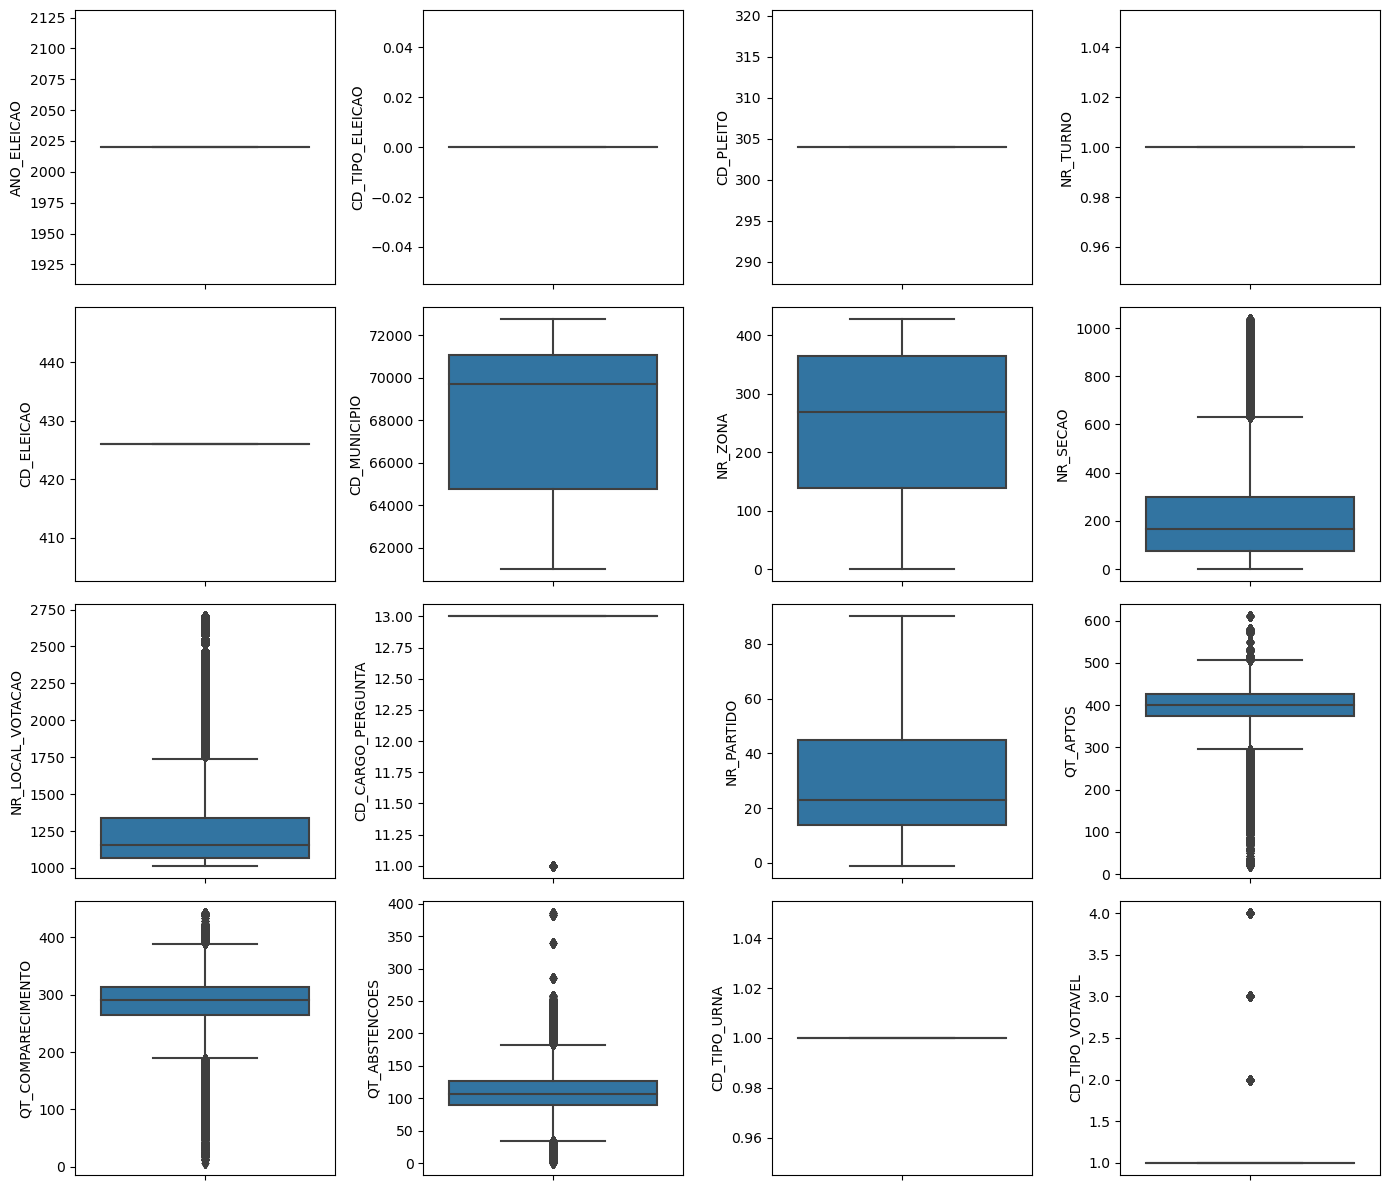

In [21]:
#Este loop percorre as colunas do DataSet verificando se tal váriavel é númerica, caso sim, é adicionado na lista
variaveis_numericas_1 = []
for i in resultados.columns[0:29].tolist():
        if resultados.dtypes[i] == 'int64' or resultados.dtypes[i] == 'float64':            
            # print(i, ':' , resultados.dtypes[i]) 
            variaveis_numericas_1.append(i)

# Criando gráfico
total_variaveis = len(variaveis_numericas_1)
linhas = (total_variaveis + 3) // 4  # Arredondamento para cima
colunas = min(total_variaveis, 4)

plt.rcParams["figure.figsize"] = [14.00, 12.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(linhas, colunas)

linha = 0
coluna = 0
# Este loop percorre a lista de colunas numéricas e plota um gráfico para cada variável
for i in variaveis_numericas_1:
    sns.boxplot(data=resultados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == colunas:
        linha += 1
        coluna = 0

plt.tight_layout()
plt.show()

Observando o gráfico acima, podemos constatar que de fato o tratamento de outliers nessa análise não será necessária, apesar de termos pontos de outliers esses dados em específico se trata de váriaveis que são códigos para a localização dentro do banco de dados. Portanto, seguiremos com nosso tratamento de dados ciente que esses outliers não serão problemas.

---

## **4. Tratamento de dados** 📚

Nessa etapa faremos o tratamento dos dados que coletamos e conhecemos nas etapas acima, serão analisados quais colunas e dados não necessitaremos para obter nossos insights, e quais dados precisarão ser tratados.

### **4.1. Perfil do Eleitorado**

Esta etapa será o tratamento de dados apenas do DataSet de perfil do eleitorado.

##### **4.1.1. Definição de colunas necessárias**

Primeiro, vamos deletar colunas desnecessárias do nosso DataSet. Como iremos fazer mudanças na estrutura original do dados, vamos precisar fazer uma cópia para executar nossos tratamentos sem alterar o DataFrame original. Agora determinaremos quais colunas irão ser necessárias, excluindo as colunas que possuem informações fúteis para nossa análise. Fazendo essa exclusão nossas análises serão executadas mais rápidas. Portanto, as **váriaveis necessárias são**:

* **SG_UF**
* **NM_MUNICIPIO**
* **NR_ZONA**
* **DS_GENERO**
* **DS_ESTADO_CIVIL**
* **DS_FAIXA_ETARIA**
* **DS_GRAU_ESCOLARIDADE**
* **QT_ELEITORES_PERFIL**
* **QT_ELEITORES_DEFICIENCIA**

    

In [22]:
#Criando copia apenas com as váriaveis necessárias
eleitorado_clean = eleitorado[['SG_UF', 'NM_MUNICIPIO', 'NR_ZONA', 'DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL', 'QT_ELEITORES_DEFICIENCIA']]
#Vendo 5 registros aleatórios 
eleitorado_clean.sample(5)

,SG_UF,NM_MUNICIPIO,NR_ZONA,DS_GENERO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_DEFICIENCIA
2911831,MG,PASSA QUATRO,137,MASCULINO,CASADO,55 a 59 anos,ANALFABETO,7,0
104973,MT,CHAPADA DOS GUIMARÃES,34,MASCULINO,VIÚVO,55 a 59 anos,ENSINO MÉDIO COMPLETO,1,0
4188775,BA,ALAGOINHAS,163,FEMININO,DIVORCIADO,65 a 69 anos,LÊ E ESCREVE,34,0
2157666,PE,ABREU E LIMA,119,FEMININO,SOLTEIRO,55 a 59 anos,SUPERIOR COMPLETO,54,0
298414,MG,ITAJUBÁ,134,MASCULINO,DIVORCIADO,60 a 64 anos,ENSINO FUNDAMENTAL COMPLETO,27,0


Como podemos constatar logo acima, criamos um novo DataFrame apenas com as colunas que farão nos responder as questões apresentada no tópico 1, e mais alguns insights que poderemos obter atráves do mesmo.

Como nossa análise será apenas com base nos dados das eleições municípais de São Paulo, podemos separar um outro DataFrame filtrando apenas a UF que tiver com a sigla SP.

In [23]:
#Guardando apenas o estado de SP
eleitorado_clean_sp = eleitorado_clean.loc[eleitorado_clean['SG_UF'] == 'SP']

#Registro aleatórios
eleitorado_clean_sp.sample(5)

,SG_UF,NM_MUNICIPIO,NR_ZONA,DS_GENERO,DS_ESTADO_CIVIL,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_DEFICIENCIA
2288428,SP,JAGUARIÚNA,333,MASCULINO,CASADO,60 a 64 anos,SUPERIOR INCOMPLETO,25,1
483825,SP,BARUERI,386,FEMININO,CASADO,80 a 84 anos,ENSINO FUNDAMENTAL COMPLETO,25,0
1590392,SP,PALMITAL,83,MASCULINO,CASADO,85 a 89 anos,SUPERIOR COMPLETO,2,0
2568496,SP,IACRI,184,FEMININO,SOLTEIRO,21 a 24 anos,SUPERIOR COMPLETO,5,0
3326965,SP,BILAC,210,FEMININO,SOLTEIRO,75 a 79 anos,ANALFABETO,1,0


##### **4.1.2. Renomeando colunas**

Como já estamos familiarizado e já temos conhecimento sobre cada váriavel, podemos renomear as colunas para padronização e para uma melhor visualização.

In [24]:
#Definindo nomes das váriaveis que serão renomeados
eleitorado_clean_sp.rename( 
    columns={
        'SG_UF': 'UF',
        'NM_MUNICIPIO': 'MUNICIPIO',
        'NR_ZONA': 'ZONA',
        'DS_GENERO': 'GENERO',
        'DS_ESTADO_CIVIL': 'ESTADO CIVIL',
        'DS_FAIXA_ETARIA': 'FAIXA ETARIA',
        'DS_GRAU_ESCOLARIDADE': 'ESCOLARIDADE',
        'QT_ELEITORES_PERFIL': 'QNTD DE PERFIS',
        'QT_ELEITORES_DEFICIENCIA': 'ELEITORES COM DEFICIENCIA'
    }, inplace=True
)

eleitorado_clean_sp.sample(5)

,UF,MUNICIPIO,ZONA,GENERO,ESTADO CIVIL,FAIXA ETARIA,ESCOLARIDADE,QNTD DE PERFIS,ELEITORES COM DEFICIENCIA
1242887,SP,PRESIDENTE VENCESLAU,102,MASCULINO,CASADO,65 a 69 anos,ENSINO FUNDAMENTAL COMPLETO,67,1
3328997,SP,ITAPORANGA,56,MASCULINO,VIÚVO,55 a 59 anos,ENSINO MÉDIO COMPLETO,2,0
3972305,SP,GARÇA,47,FEMININO,DIVORCIADO,85 a 89 anos,ANALFABETO,1,0
2762877,SP,SÃO PAULO,350,FEMININO,DIVORCIADO,65 a 69 anos,ANALFABETO,19,3
2378946,SP,SUZANO,181,MASCULINO,DIVORCIADO,60 a 64 anos,ENSINO FUNDAMENTAL INCOMPLETO,96,9


Como podemos constatar, houve-se a mudança dos nomes das colunas. Agora a visualização do DataFrame está mais limpa e de fácil entendimento.

Agora para finalizar vamos reindexar nosso DataFrame para tornar os índices em ordem sequencial.

In [25]:
#Reindexando os indices
eleitorado_clean_sp.reset_index(drop=True)

,UF,MUNICIPIO,ZONA,GENERO,ESTADO CIVIL,FAIXA ETARIA,ESCOLARIDADE,QNTD DE PERFIS,ELEITORES COM DEFICIENCIA
0,SP,SÃO BENTO DO SAPUCAÍ,314,FEMININO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL INCOMPLETO,47,1
1,SP,SÃO BENTO DO SAPUCAÍ,314,FEMININO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL COMPLETO,5,0
2,SP,SÃO BENTO DO SAPUCAÍ,314,FEMININO,CASADO,70 a 74 anos,ENSINO MÉDIO INCOMPLETO,1,0
3,SP,SÃO BENTO DO SAPUCAÍ,314,FEMININO,CASADO,70 a 74 anos,ENSINO MÉDIO COMPLETO,10,0
4,SP,SÃO BENTO DO SAPUCAÍ,314,FEMININO,CASADO,70 a 74 anos,SUPERIOR COMPLETO,23,0
...,...,...,...,...,...,...,...,...,...
639497,SP,VOTUPORANGA,147,MASCULINO,CASADO,55 a 59 anos,ENSINO MÉDIO COMPLETO,512,0
639498,SP,VOTUPORANGA,147,MASCULINO,CASADO,55 a 59 anos,SUPERIOR INCOMPLETO,41,0
639499,SP,VOTUPORANGA,147,MASCULINO,CASADO,55 a 59 anos,SUPERIOR COMPLETO,323,2
639500,SP,VOTUPORANGA,147,MASCULINO,CASADO,60 a 64 anos,ANALFABETO,26,0


### **4.2. Resultados das eleições**

Agora, esta etapa será o tratamento de dados do DataSet de resultados das eleições municípais de São Paulo.

##### **4.2.1. Definição de colunas necessárias**

Novamente iremos primeiro deletar colunas desnecessárias do nosso DataSet. Como já dito, iremos fazer alterações na estrutura original do DataSet, portanto faremos uma cópia para manipulação. A seguir determinaremos quais colunas irão ser necessárias, excluindo as colunas que possuem informações fúteis para nossa análise. Fazendo essa exclusão nossas análises serão executadas mais rápidas. Portanto, as **váriaveis necessárias são**:

* **SG_UF**
* **NM_MUNICIPIO**
* **NR_ZONA**
* **NR_SECAO**
* **DS_CARGO_PERGUNTA**
* **SG_PARTIDO**
* **QT_APTOS**
* **QT_COMPARECIMENTO**
* **QT_ABSTENCOES**
* **DS_TIPO_VOTAVEL**
* **NR_VOTAVEL**
* **NM_VOTAVEL**
* **QT_VOTOS**



In [26]:
#Criando copia apenas com as váriaveis necessárias
resultados_clean = resultados[['SG_UF', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO_PERGUNTA', 'SG_PARTIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES', 'DS_TIPO_VOTAVEL', 'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS']]
#Vendo 5 registros aleatórios 
resultados_clean.sample(5)

,SG_UF,NM_MUNICIPIO,NR_ZONA,NR_SECAO,DS_CARGO_PERGUNTA,SG_PARTIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
4210625,SP,SÃO PAULO,255,267,Vereador,PP,486,337,149,Nominal,11193,MAJOR PALUMBO,3
8390978,SP,SÃO PAULO,398,46,Vereador,PT,402,251,151,Nominal,13013,SONIA COELHO,1
7788716,SP,SANTO ANDRÉ,383,39,Vereador,MDB,440,321,119,Nominal,15321,IRINEU JOÃO,1
2868980,SP,SUZANO,181,176,Vereador,PT,408,285,123,Nominal,13456,MIRIAM NOVAIS,1
3140316,SP,PORTO FERREIRA,194,116,Vereador,REPUBLICANOS,400,313,87,Nominal,10123,RENATO ROSA DO POSTÃO,9


##### **4.2.2. Renomeando colunas**

Também realizaremos esse processo no DataSet de resultados, como já dito renomear as colunas nos trás uma visualização mais limpa e organizada.


In [27]:
#Definindo nomes das váriaveis que serão renomeados
resultados_clean.rename( 
    columns={
        'SG_UF': 'UF',
        'NM_MUNICIPIO': 'MUNICIPIO',
        'NR_ZONA': 'ZONA',
        'NR_SECAO': 'SECAO',
        'DS_CARGO_PERGUNTA': 'CARGO',
        'SG_PARTIDO': 'PARTIDO',
        'QT_APTOS': 'QNTD DE APTOS',
        'QT_COMPARECIMENTO': 'QNTD DE COMPARECIMENTO',
        'QT_ABSTENCOES': 'ABSTENCOES',
        'DS_TIPO_VOTAVEL': 'TIPO DE VOTO',
        'NR_VOTAVEL': 'N° DO CANDIDATO',
        'NM_VOTAVEL': 'CANDIDATO',
        'QT_VOTOS': 'QNTD DE VOTOS'
    }, inplace=True
)

resultados_clean.sample(5)

,UF,MUNICIPIO,ZONA,SECAO,CARGO,PARTIDO,QNTD DE APTOS,QNTD DE COMPARECIMENTO,ABSTENCOES,TIPO DE VOTO,N° DO CANDIDATO,CANDIDATO,QNTD DE VOTOS
2849530,SP,COLINA,178,31,Vereador,SOLIDARIEDADE,414,321,93,Nominal,77123,BRUNO AURELIO,4
4719549,SP,SÃO CAETANO DO SUL,269,32,Vereador,PRTB,388,300,88,Nominal,28800,GIOVANI FALCONE,2
5710254,SP,GUARUJÁ,310,37,Vereador,PTB,433,324,109,Nominal,14200,PR.RICARDO MADUREIRA,1
9036080,SP,SÃO BERNARDO DO CAMPO,414,169,Vereador,PT,305,230,75,Nominal,13654,ADMILSON OLIVEIRA,2
818652,SP,CAMPOS DO JORDÃO,35,38,Vereador,PSD,426,300,126,Nominal,55040,MARCELINHO DO PASSE,2


Com as colunas renomeadas, seguimos com nosso tratamento.

##### **4.2.3. Tratando valores nulos**

Vamos visualizar novamente os dados nulos referente aquele valor NaN, na váriavel "CANDIDATO".

In [28]:
#filtrando a coluna candidato pra retornar apenas valores NaN
resultados_clean[resultados_clean['CANDIDATO'].isnull()][['CANDIDATO', 'N° DO CANDIDATO', 'MUNICIPIO', 'CARGO', 'PARTIDO']]

,CANDIDATO,N° DO CANDIDATO,MUNICIPIO,CARGO,PARTIDO
2851460,NaN,19555,TERRA ROXA,Vereador,PODE
2851506,NaN,19555,TERRA ROXA,Vereador,PODE
2851594,NaN,19555,TERRA ROXA,Vereador,PODE
2851696,NaN,19555,TERRA ROXA,Vereador,PODE
2851765,NaN,19555,TERRA ROXA,Vereador,PODE
2851874,NaN,19555,TERRA ROXA,Vereador,PODE
2851937,NaN,19555,TERRA ROXA,Vereador,PODE
2851986,NaN,19555,TERRA ROXA,Vereador,PODE
2852012,NaN,19555,TERRA ROXA,Vereador,PODE
2852147,NaN,19555,TERRA ROXA,Vereador,PODE


Como ja tinhamos analisado no item 3.1 no tópico de "Checando valores nulos", temos 13 valores NaN(nulos) na váriavel "CANDIDATO" que corresponde a **[Ana Claudia Tychoniuk](https://www.diariocidade.com/sp/terra-roxa/eleicoes/2020/candidatos/vereador/na-19555/)** uma candidata do município de TERRA ROXA(SP) que concorreu ao cargo de vereadora pelo partido "PODEMOS". Para nosso DataSet ficar completo com o nome de todos os candidatos, vamos trocar esses valores nulos pelo nome da candidata na qual refere-se os dados citados.

In [29]:
#Nome da candidata
nome_candidata_nan = "ANA CLAUDIA TYCHONIUK"
#Nome da coluna que está o valor NaN
coluna_candidata_nan = "CANDIDATO"
#Atribuindo com o metodo replace o nome da candidata na coluna candidato
resultados_clean[coluna_candidata_nan] = resultados_clean[coluna_candidata_nan].replace({None: nome_candidata_nan})

#novo filtro retornando o nome da candidata já renomeada
resultados_clean[resultados_clean['CANDIDATO'] == 'ANA CLAUDIA TYCHONIUK'][['CANDIDATO', 'N° DO CANDIDATO', 'MUNICIPIO', 'CARGO', 'PARTIDO']]

,CANDIDATO,N° DO CANDIDATO,MUNICIPIO,CARGO,PARTIDO
2851460,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE
2851506,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE
2851594,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE
2851696,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE
2851765,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE
2851874,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE
2851937,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE
2851986,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE
2852012,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE
2852147,ANA CLAUDIA TYCHONIUK,19555,TERRA ROXA,Vereador,PODE


Como podemos constatar, agora temos o correto nome da candidata ao invés do valor nulo que estava anteriormente.

Agora podemos realizar mais um tratamento, pois na coluna "PARTIDO" existem bastantes valores com #NULO#, esses valores referem-se quando um candidato(a) recebe um voto Nulo ou Branco. Veremos logo abaixo:

In [30]:
resultados_clean[resultados_clean['PARTIDO'] == '#NULO#'][['PARTIDO', 'TIPO DE VOTO', 'CANDIDATO']]

,PARTIDO,TIPO DE VOTO,CANDIDATO
0,#NULO#,Branco,Branco
7,#NULO#,Nulo,Nulo
28,#NULO#,Nulo,Nulo
93,#NULO#,Branco,Branco
137,#NULO#,Branco,Branco
...,...,...,...
9433934,#NULO#,Nulo,Nulo
9433960,#NULO#,Nulo,Nulo
9433962,#NULO#,Branco,Branco
9433991,#NULO#,Branco,Branco


Vamos renomear esses valores #NULO# da coluna "PARTIDO" para algo que possamos entender logo de cara. Iremos renomear para "Nulo" ou "Branco" de acordo com a coluna "TIPO DE VOTO", por exemplo, se a coluna "TIPO DE VOTO" tiver valor "Branco", a váriavel "PARTIDO" vai receber um valor "Branco".

In [31]:
# Definir condições para renomear valores na coluna "PARTIDO"
condicao_branco = resultados_clean['TIPO DE VOTO'] == 'Branco'
condicao_nulo = resultados_clean['TIPO DE VOTO'] == 'Nulo'

# Atualizar os valores com metodo loc na coluna partido, se as condições acima for verdadeira
resultados_clean.loc[condicao_branco, 'PARTIDO'] = 'Branco'
resultados_clean.loc[condicao_nulo, 'PARTIDO'] = 'Nulo'


In [32]:
#Checando se os valores com Nulo foram trocados corretamente
resultados_clean[resultados_clean['PARTIDO'] == 'Nulo'][['PARTIDO', 'TIPO DE VOTO', 'CANDIDATO']].head(5)

,PARTIDO,TIPO DE VOTO,CANDIDATO
7,Nulo,Nulo,Nulo
28,Nulo,Nulo,Nulo
145,Nulo,Nulo,Nulo
148,Nulo,Nulo,Nulo
273,Nulo,Nulo,Nulo


In [33]:
#Checando se os valores com Branco foram trocados corretamente
resultados_clean[resultados_clean['PARTIDO'] == 'Branco'][['PARTIDO', 'TIPO DE VOTO', 'CANDIDATO']].head(5)

,PARTIDO,TIPO DE VOTO,CANDIDATO
0,Branco,Branco,Branco
93,Branco,Branco,Branco
137,Branco,Branco,Branco
201,Branco,Branco,Branco
275,Branco,Branco,Branco


Como já podemos constatar nos DataFrame acima, os valores foram renomeados conforme o planejado. Agora todo o DataSet está com um padrão na váriavel "PARTIDO", onde de acordo com a condição na váriavel "TIPO DE VOTO", os campos que eram #NULO# agora estão como "Branco" ou "Nulo". 

### **4.3. Filtrando e criando DataFrame auxiliares**

Aqui iremos criar DataSets auxiliares para melhor eficiência e rapidez quando estivermos fazendo nossas análises.

- **DataFrame com apenas votos nulos e brancos**

In [34]:
#Filtrando e criando DataFrame apenas com votos nulos e brancos
filtro_nulos_brancos = resultados_clean['TIPO DE VOTO'].isin(['Nulo', 'Branco'])
resultados_nulos_brancos = resultados_clean[filtro_nulos_brancos]

resultados_nulos_brancos.sample(5)

,UF,MUNICIPIO,ZONA,SECAO,CARGO,PARTIDO,QNTD DE APTOS,QNTD DE COMPARECIMENTO,ABSTENCOES,TIPO DE VOTO,N° DO CANDIDATO,CANDIDATO,QNTD DE VOTOS
2872650,SP,SUZANO,181,240,Vereador,Nulo,402,310,92,Nulo,96,Nulo,10
7769583,SP,SÃO PAULO,381,655,Vereador,Branco,202,146,56,Branco,95,Branco,18
29138,SP,SÃO PAULO,1,279,Prefeito,Branco,427,239,188,Branco,95,Branco,8
766126,SP,CAJURU,32,53,Vereador,Branco,382,298,84,Branco,95,Branco,12
5772747,SP,OSASCO,315,139,Vereador,Nulo,427,325,102,Nulo,96,Nulo,29


- **DataFrame com apenas votos nominais**

In [35]:
#Filtrando e criando DataFrame apenas com votos nominais, sem nulos e brancos e votos em legenda
filtro_nulos_brancos_legenda = resultados_clean['TIPO DE VOTO'].isin(['Nulo', 'Branco', 'Legenda'])
resultados_votos_nominais = resultados_clean[~filtro_nulos_brancos_legenda]

resultados_votos_nominais.sample(5)

,UF,MUNICIPIO,ZONA,SECAO,CARGO,PARTIDO,QNTD DE APTOS,QNTD DE COMPARECIMENTO,ABSTENCOES,TIPO DE VOTO,N° DO CANDIDATO,CANDIDATO,QNTD DE VOTOS
8427311,SP,LIMEIRA,399,88,Vereador,PSD,491,332,159,Nominal,55770,MARQUINHOS DA PARADA SERTANEJA,2
9409049,SP,DIADEMA,426,22,Prefeito,PT,423,328,95,Nominal,13,FILIPPI,136
2425801,SP,TIETÊ,142,51,Vereador,PRTB,340,270,70,Nominal,28333,NELSINHO,1
8316734,SP,JACAREÍ,396,62,Vereador,PATRIOTA,370,239,131,Nominal,51111,CABRAL ANTENAS,3
8777551,SP,SÃO PAULO,408,271,Vereador,PT,416,305,111,Nominal,13114,JAIR TATTO,3


- **DataFrame com apenas candidatos a Prefeito**

In [38]:
#Separando cargo dos candidatos - PREFEITO
filtro_votos_nominais = resultados_votos_nominais['CARGO'].isin(['Prefeito'])
resultados_votos_nominais_prefeito = resultados_votos_nominais[filtro_votos_nominais]

resultados_votos_nominais_prefeito.sample(5)

,UF,MUNICIPIO,ZONA,SECAO,CARGO,PARTIDO,QNTD DE APTOS,QNTD DE COMPARECIMENTO,ABSTENCOES,TIPO DE VOTO,N° DO CANDIDATO,CANDIDATO,QNTD DE VOTOS
8615841,SP,SÃO PAULO,404,328,Prefeito,REPUBLICANOS,426,329,97,Nominal,10,CELSO RUSSOMANNO,38
3830125,SP,SÃO PAULO,247,469,Prefeito,PSB,402,302,100,Nominal,40,MÁRCIO FRANÇA,51
5898225,SP,SÃO PAULO,320,342,Prefeito,PSOL,389,270,119,Nominal,50,GUILHERME BOULOS,44
1745515,SP,PIRASSUNUNGA,96,67,Prefeito,REPUBLICANOS,310,233,77,Nominal,10,CRISTINA DO LÉSSIO,23
4163988,SP,SÃO PAULO,254,319,Prefeito,PSB,415,319,96,Nominal,40,MÁRCIO FRANÇA,46


- **DataFrame com apenas candidatos a Vereador**

In [41]:
#Separando cargo dos candidatos - VEREADOR
resultados_votos_nominais_vereador = resultados_votos_nominais[~filtro_votos_nominais]

resultados_votos_nominais_vereador.sample(5)

,UF,MUNICIPIO,ZONA,SECAO,CARGO,PARTIDO,QNTD DE APTOS,QNTD DE COMPARECIMENTO,ABSTENCOES,TIPO DE VOTO,N° DO CANDIDATO,CANDIDATO,QNTD DE VOTOS
5245912,SP,SÃO BERNARDO DO CAMPO,284,3,Vereador,AVANTE,417,292,125,Nominal,70680,RICK CHAVES,1
4514767,SP,PIRAPOZINHO,261,92,Vereador,PODE,433,333,100,Nominal,19500,JOSEFA HORTILDE JÔ,1
7745225,SP,SÃO PAULO,381,341,Vereador,MDB,418,319,99,Nominal,15017,ANADETHY CARAVANISTA,1
7699246,SP,CAMPINAS,380,182,Vereador,PSB,363,218,145,Nominal,40021,WELLINGTON SYLLOS,1
7908505,SP,BARUERI,386,269,Vereador,SOLIDARIEDADE,429,329,100,Nominal,77242,MINEIRO DO ENGENHO NOVO,4


---

## **5. Analisando Correlações** 📈

### **5.1. Análise de correlação - Perfil do eleitorado**

Nesta etapa iremos analisar o grau de relacionamento entre as váriaveis do nosso DataSet de **Perfil do eleitorado**.

In [42]:
#Usando o metodo corr() para verificar a correlação das variaveis
correlacao_eleitorado_sp = eleitorado_clean_sp.corr()

correlacao_eleitorado_sp

,ZONA,QNTD DE PERFIS,ELEITORES COM DEFICIENCIA
ZONA,1.000000,0.116625,0.099487
QNTD DE PERFIS,0.116625,1.000000,0.408506
ELEITORES COM DEFICIENCIA,0.099487,0.408506,1.000000


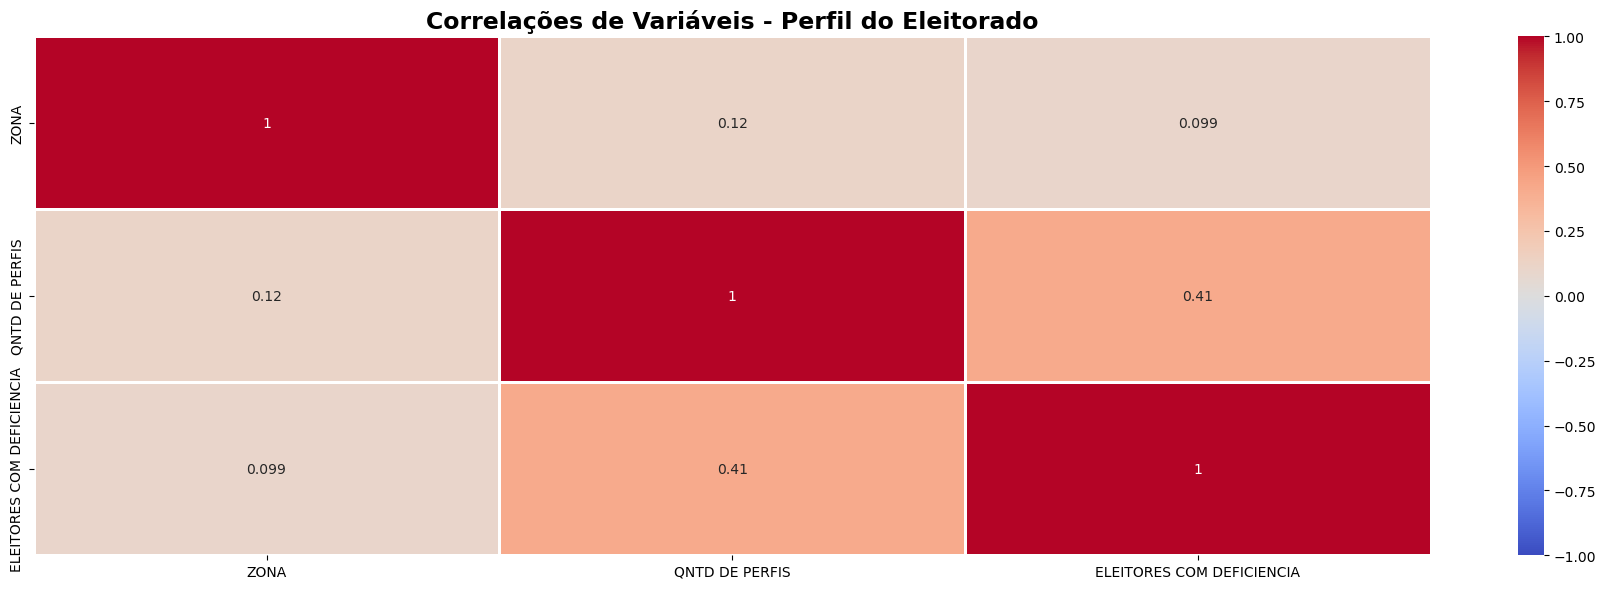

In [43]:
# Definindo tamanho da figura:
fig, ax = plt.subplots(figsize=(18, 6))

# Criando o Heatmap:
ax = sns.heatmap(data=correlacao_eleitorado_sp, 
                 vmin=-1, 
                 vmax=1, 
                 annot=True, 
                 linewidths=1,
                 cmap='coolwarm')

# Formatação:
plt.title('Correlações de Variáveis - Perfil do Eleitorado', pad=6, fontdict={'size': 17, 
                                                        'weight': 'bold'})

plt.show()

Fazendo uma breve análise da correlação entre as váriaveis atráves do heatmap acima, podemos afirmar que "QNTD DE PERFIS" e "ELEITORES COM DEFICIENCIA" possui uma correlação fraca positiva, pois é abaixo de 0,60.


### **5.2. Análise de correlação - Resultados**

Agora também iremos analisar o grau de relacionamento entre as váriaveis do nosso DataSet de **Resultados das eleições**.

In [44]:
#Usando o metodo corr() para verificar a correlação das variaveis
correlacao_resultados = resultados_clean.corr()

correlacao_resultados

,ZONA,SECAO,QNTD DE APTOS,QNTD DE COMPARECIMENTO,ABSTENCOES,N° DO CANDIDATO,QNTD DE VOTOS
ZONA,1.000000,0.169721,0.043096,0.117397,-0.097435,0.004346,-0.013304
SECAO,0.169721,1.000000,-0.014652,0.123981,-0.202674,0.003521,-0.009275
QNTD DE APTOS,0.043096,-0.014652,1.000000,0.800548,0.506587,0.015886,0.012742
QNTD DE COMPARECIMENTO,0.117397,0.123981,0.800548,1.000000,-0.111136,0.014199,0.038600
ABSTENCOES,-0.097435,-0.202674,0.506587,-0.111136,1.000000,0.005915,-0.034404
N° DO CANDIDATO,0.004346,0.003521,0.015886,0.014199,0.005915,1.000000,-0.237170
QNTD DE VOTOS,-0.013304,-0.009275,0.012742,0.038600,-0.034404,-0.237170,1.000000


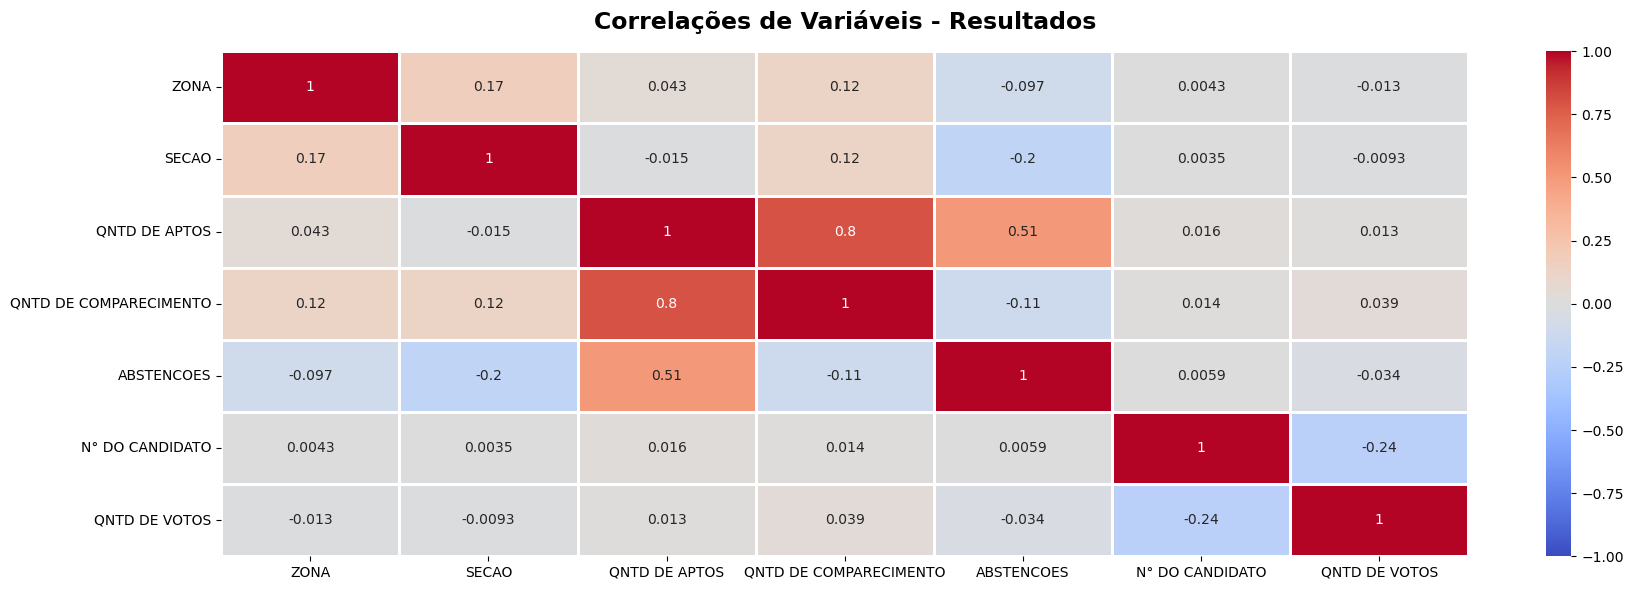

In [45]:
# Definindo tamanho da figura:
fig, ax = plt.subplots(figsize=(18, 6))

# Criando o Heatmap:
ax = sns.heatmap(data=correlacao_resultados, 
                 vmin=-1, 
                 vmax=1, 
                 annot=True, 
                 linewidths=1,
                 cmap='coolwarm')

# Formatação:
plt.title('Correlações de Variáveis - Resultados', pad=16, fontdict={'size': 17, 
                                                        'weight': 'bold'})

plt.show()

Analisando agora as correlações das váriaveis do DataSet de resultados, podemos destacar alguns pontos:

- Possui uma correlação moderada com a **quantidade de aptos com as abstenções**(0.51), ou seja, quanto mais a quantidade de aptos a votar, se mais tem chance em ter mais pessoas se negarem a votar.
- Possui uma correlação forte com a **quantidade de aptos a votar e a quantidade de comparecimento**(0.80). O que já era de se imaginar, pois quanto mais a quantidade de aptos a votar mais será a quantidade de comparecimento as urnas.

---

## **6. Analises iniciais e informações importantes** 📊

### **6.1. Quantidade e Porcentagem de votos NULOS/BRANCOS em São Paulo**

In [46]:
#Somando a quantidade de votos que se obteve os Nulos e Brancos
soma_votos_nulos = resultados_clean[resultados_clean['CANDIDATO'] == 'Nulo']['QNTD DE VOTOS'].sum()
soma_votos_brancos = resultados_clean[resultados_clean['CANDIDATO'] == 'Branco']['QNTD DE VOTOS'].sum()

# Calcular o total de linhas no DataFrame original
total_linhas = len(resultados)

#Realiza o calculo de porcentagem
votos_nulos_porcentagem = (soma_votos_nulos / total_linhas) * 100
votos_brancos_porcentagem = (soma_votos_brancos / total_linhas) * 100

#Cria um dicionario com o nome da coluna e os valores
votos_nulos_brancos = [{
    'Frequência Nulos': soma_votos_nulos,
    'Porcentagem Nulos(%)': votos_nulos_porcentagem,
    'Frequência Brancos': soma_votos_brancos,
    'Porcentagem Brancos(%)': votos_brancos_porcentagem
}]

#transforma em dataframe
df_votos_nulos_brancos = pd.DataFrame(votos_nulos_brancos)
df_votos_nulos_brancos


,Frequência Nulos,Porcentagem Nulos(%),Frequência Brancos,Porcentagem Brancos(%)
0,3854314,40.855565,2856552,30.27933


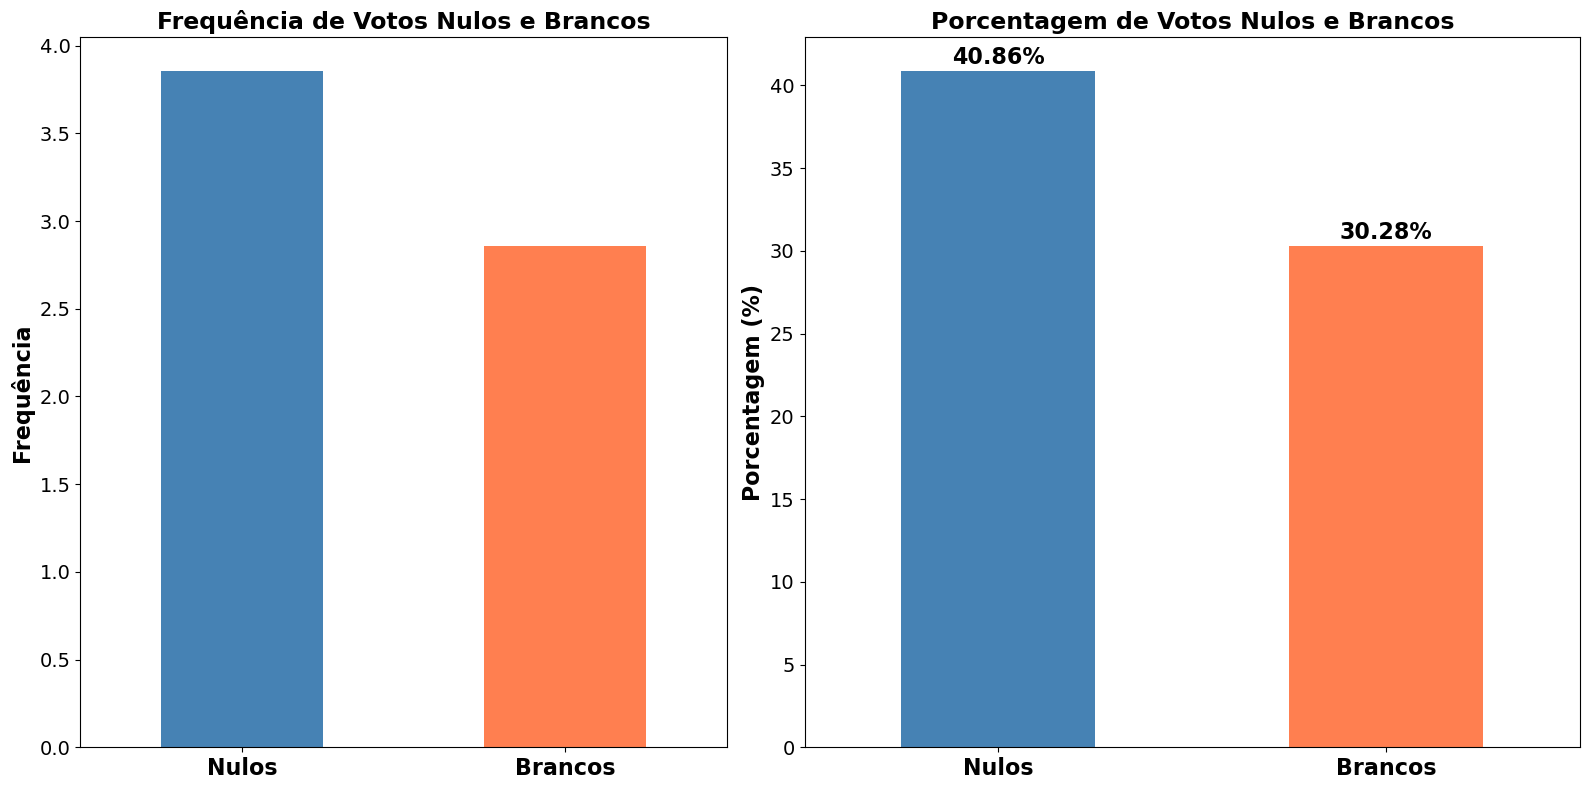

In [47]:
# Dados para o gráfico
labels = ['Nulos', 'Brancos']
frequencias = [soma_votos_nulos, soma_votos_brancos]
porcentagens = [votos_nulos_porcentagem, votos_brancos_porcentagem]

# Criação do DataFrame
data = {
    'Frequência': frequencias,
    'Porcentagem': porcentagens
}
df_votos_nulos_brancos = pd.DataFrame(data, index=labels)

# Aumentar a distância entre os gráficos usando gridspec_kw
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1.2]})

# Gráfico da esquerda (Frequência) - Alteração de titulo, tamanho e cores das barras
df_votos_nulos_brancos['Frequência'].plot(kind='bar', ax=axes[0], color=['#4682B4', '#FF7F50'])
axes[0].set_ylabel('Frequência', fontsize=16, fontweight='bold')
axes[0].set_title('Frequência de Votos Nulos e Brancos', fontsize=17, fontweight='bold')

# Gráfico da direita (Porcentagem) - Alteração de titulo, tamanho e cores das barras
bar_plot = df_votos_nulos_brancos['Porcentagem'].plot(kind='bar', ax=axes[1], color=['#4682B4', '#FF7F50'])
axes[1].set_ylabel('Porcentagem (%)', fontsize=16, fontweight='bold')
axes[1].set_title('Porcentagem de Votos Nulos e Brancos', fontsize=17, fontweight='bold')

# Adicionar valores exatos nas barras do gráfico de porcentagem
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=16, fontweight='bold')

# Ajustar rotação dos rótulos do eixo x e alteração de tamanho e negrito
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, fontsize=16, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, fontsize=16, fontweight='bold')

#Alteração do tamanho dos valores do eixo y
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=14)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=14)

plt.show()

Aqui podemos peceber que mais de 40% de todos os votos do estado de São Paulo foram votos **Nulos**, enquanto que 30% foram votos **Brancos**. Esses dados levam em consideração todos os municípios do estado, e os votos Nulos e Brancos para Vereador e Prefeito.

O que se pode explicar os mais de 6,5 Milhões de votos Nulos e Brancos foram as preocupações da população em se contrair Covid-19. Naquele ano se teve um [recorde mundial de mortes pela doença](https://www.sanarmed.com/linha-do-tempo-do-coronavirus-no-brasil). 

### **6.1. Qual partido foi mais votado em São Paulo?**

In [139]:
#Agrupando por partido e somando a quantidade de votos
soma_votos = resultados_votos_nominais.groupby(['PARTIDO'])['QNTD DE VOTOS'].sum()
#seleciona apenas os tres partidos com mais votos para prefeito e vereador
partidos_mais_votados = soma_votos_prefeitos.nlargest(6)

df_partidos_mais_votados = pd.DataFrame(partidos_mais_votados).reset_index()

df_partidos_mais_votados

,PARTIDO,QNTD DE VOTOS
0,PSDB,7674221
1,PSD,3250831
2,PT,2679246
3,REPUBLICANOS,2620577
4,MDB,2383361
5,DEM,2352189


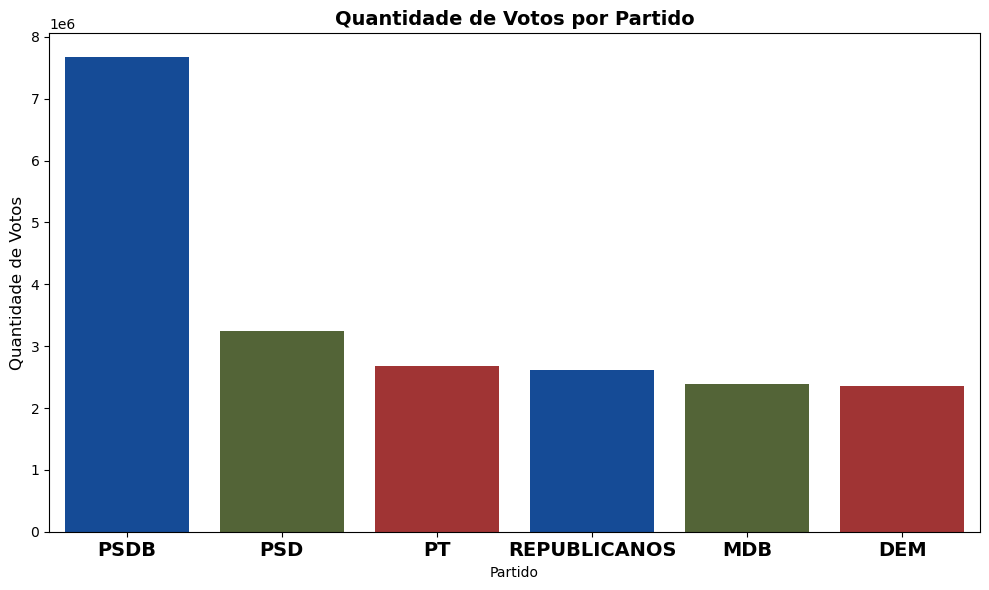

In [140]:
cores = ['#0047AB', '#556B2F','#B22222']

plt.figure(figsize=(10, 6))
sns.barplot(x='PARTIDO', y='QNTD DE VOTOS', data=df_partidos_mais_votados, palette=cores)
plt.title('Quantidade de Votos por Partido', fontsize=14, fontweight='bold')
plt.xlabel('Partido')
plt.ylabel('Quantidade de Votos', rotation=90, fontsize=12)
plt.xticks(rotation=0, fontsize=14, fontweight='bold')
plt.show()

Analisando o gráfico acima, podemos perceber que o estado de São Paulo tem uma grande influência do Partido da Social Democracia Brasileira **PSDB**. Contando os votos de candidatos a prefeitos e vereadores, temos que o PSDB obteve mais que o dobro de votos em comparação a outros partidos.

Em 2023 o [PSDB deixou de governar São Paulo](https://g1.globo.com/sp/sao-paulo/eleicoes/2022/noticia/2022/10/02/com-derrota-de-rodrigo-garcia-nas-urnas-psdb-deixa-de-governar-sao-paulo-em-2023-apos-28-anos-e-6-governadores-diferentes.ghtml) pela primeira vez após 28 anos. Mas mesmo assim, o PSDB tem as maiores quantidade de votos de eleitores de todo o estado, contando com mais de 7,5 milhões de votos para prefeito e vereador nas eleições municípais de 2020.

---

## **7. Análises principais do Relatório** 📝

Depois que vimos alguns insights interessantes sobre nossos dados, vamos partir agora para os pontos princípais desse relatório. Relembrando o que precisa ser analisado são os seguinte tópicos:

- Em qual município o candidato X foi mais votado;
- Qual candidato foi mais votado em cada município;
- Qual perfil do eleitorado (faixa etária, gênero, grau de escolaridade, etc.) mais votou em cada candidato.

### **7.1. Em qual município o candidato X foi mais votado / Qual candidato foi mais votado em cada município**

A análise abaixo responde as duas primeiras questões apresentadas logo acima.

Iremos responder este tópico analisando primeiro os votos para **Prefeito** e logo em seguida para **Vereador**.

##### **7.1.1. Prefeito**

In [48]:
#Atribuindo a várivavel o agrupamento de candidato e municipio e somando a quantidade de votos
prefeito_mais_votado_municipio = resultados_votos_nominais_prefeito[['MUNICIPIO', 'CANDIDATO', 'QNTD DE VOTOS']].groupby([resultados_votos_nominais_prefeito['CANDIDATO'], resultados_votos_nominais_prefeito['MUNICIPIO']]).sum().sort_values(by='QNTD DE VOTOS', ascending=False).reset_index()

# Encontrar o índice do candidato mais votado para cada município
indices_max_votos = prefeito_mais_votado_municipio.groupby('MUNICIPIO')['QNTD DE VOTOS'].idxmax()

# Filtrar o DataFrame original usando os índices encontrados
prefeito_mais_votado_municipio = prefeito_mais_votado_municipio.loc[indices_max_votos].sort_values(by='QNTD DE VOTOS', ascending=False).reset_index()

prefeito_mais_votado_municipio.head(5)

,index,CANDIDATO,MUNICIPIO,QNTD DE VOTOS
0,0,BRUNO COVAS,SÃO PAULO,1754013
1,6,PAULO SERRA,SANTO ANDRÉ,266591
2,7,ORLANDO MORANDO,SÃO BERNARDO DO CAMPO,261761
3,8,GUTI,GUARULHOS,261211
4,9,FELICIO,SÃO JOSÉ DOS CAMPOS,204800


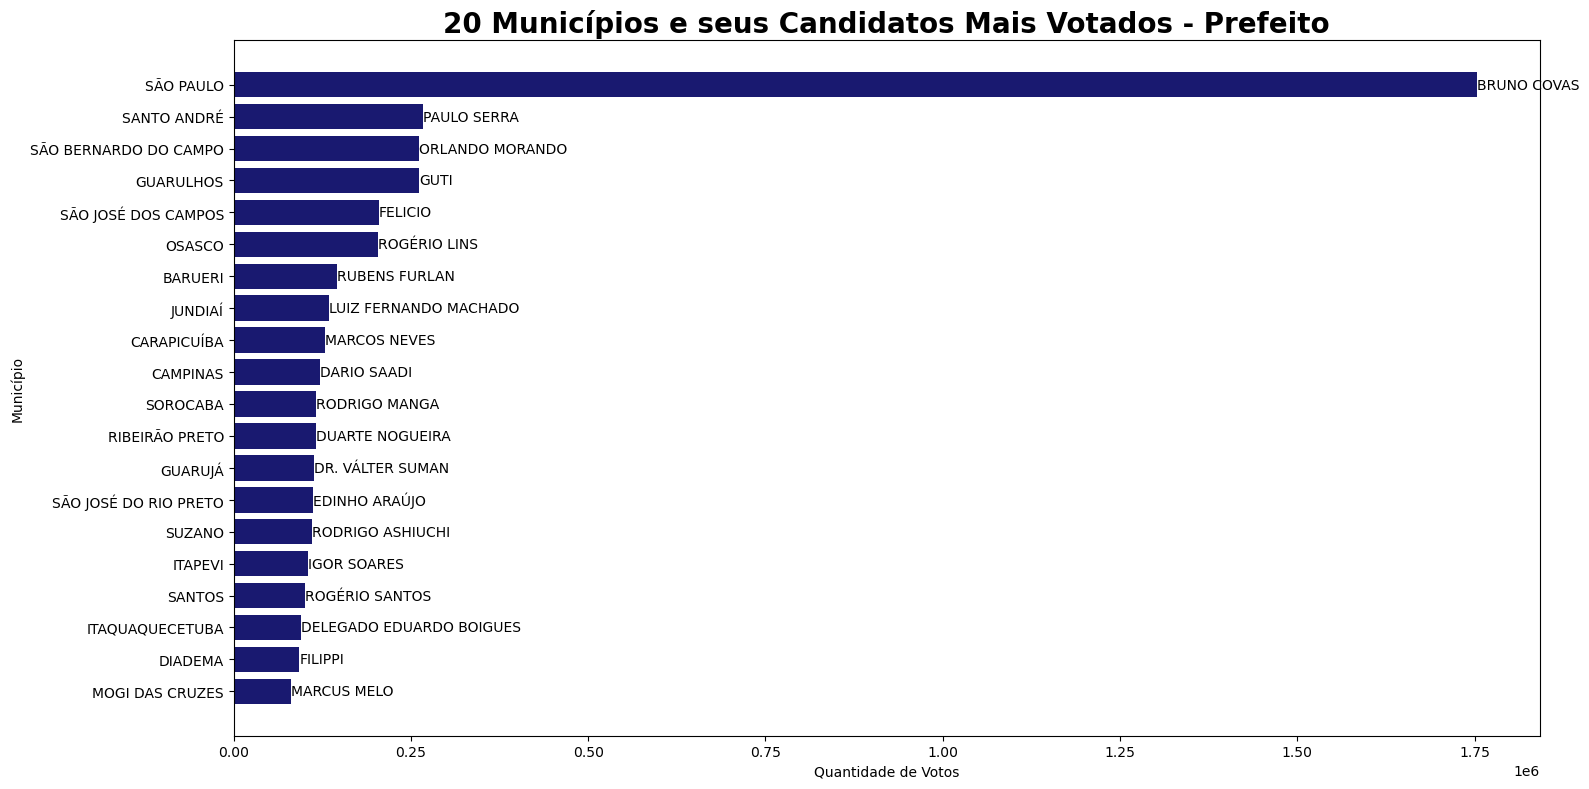

In [49]:
top20_prefeito_mais_votado_municipio = prefeito_mais_votado_municipio.head(20)
# Criar um gráfico de barras horizontais
plt.figure(figsize=(16, 8))
bars = plt.barh(top20_prefeito_mais_votado_municipio['MUNICIPIO'], top20_prefeito_mais_votado_municipio['QNTD DE VOTOS'], color='#191970')

# Adicionar o nome do candidato em cada barrra
for bar, candidato in zip(bars, top20_prefeito_mais_votado_municipio['CANDIDATO']):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, candidato, ha='left', va='center', fontsize=10)

plt.xlabel('Quantidade de Votos')
plt.ylabel('Município')
plt.title('20 Municípios e seus Candidatos Mais Votados - Prefeito', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(False)

plt.tight_layout()
plt.show()

Analisando o gráfico acima podemos perceber quais são os candidatos mais votados em cada município (apenas os 20 que obtiveram mais votos), podemos perceber que São Paulo é o único com mais de 1,7 milhões de votos para apenas um candidato, enquanto que outros municípios e seus candidatos mais votados contam com menos de 1/6 desse valor. É claro que isso se deve ao fato de que a cidade de [São Paulo é o maior colégio eleitoral do Brasil](https://agenciabrasil.ebc.com.br/eleicoes-2020/noticia/2020-11/com-33-milhoes-de-eleitores-sp-e-maior-colegio-eleitoral-do-brasil).

Podemos notar também que as [cidades mais populosas de São Paulo](https://oglobo.globo.com/brasil/sao-paulo/noticia/2023/06/censo-2022-veja-a-lista-das-10-maiores-e-menores-cidades-de-sao-paulo.ghtml), nem sempre estão em ordem decrescente no gráfico acima. Isso pode ocorrer devido a variância dos números de votos Nulos e Brancos que se obteve em cada município.

##### **7.1.2. Vereador**

In [50]:
#Atribuindo a várivavel o agrupamento de candidato e municipio e somando a quantidade de votos
vereador_mais_votado_municipio = resultados_votos_nominais_vereador[['MUNICIPIO', 'CANDIDATO', 'QNTD DE VOTOS']].groupby([resultados_votos_nominais_vereador['CANDIDATO'], resultados_votos_nominais_vereador['MUNICIPIO']]).sum().sort_values(by='QNTD DE VOTOS', ascending=False)

# Encontrar o índice do candidato mais votado para cada município
indices_max_votos = vereador_mais_votado_municipio.groupby('MUNICIPIO')['QNTD DE VOTOS'].idxmax()

# Filtrar o DataFrame original usando os índices encontrados
vereador_mais_votado_municipio = vereador_mais_votado_municipio.loc[indices_max_votos].sort_values(by='QNTD DE VOTOS', ascending=False).reset_index()

vereador_mais_votado_municipio.head(5)

,CANDIDATO,MUNICIPIO,QNTD DE VOTOS
0,EDUARDO SUPLICY,SÃO PAULO,167552
1,MARIANA CONTI,CAMPINAS,10886
2,DANILO LIMA,SÃO BERNARDO DO CAMPO,8930
3,DULCE RITA,SÃO JOSÉ DOS CAMPOS,8459
4,TELMA DE SOUZA,SANTOS,8381


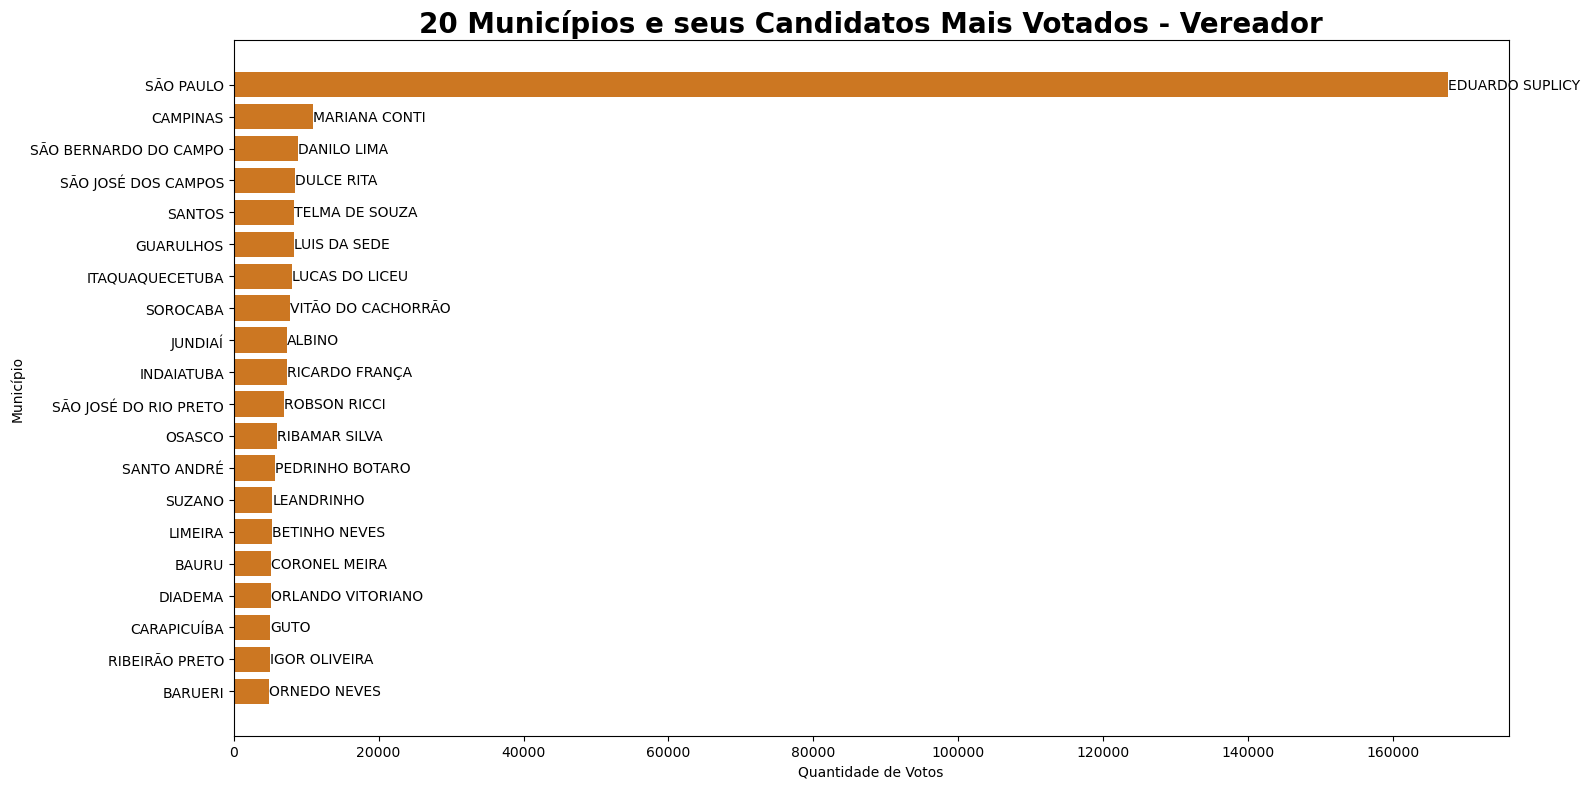

In [51]:
top20_vereador_mais_votado_municipio = vereador_mais_votado_municipio.head(20)
# Criar um gráfico de barras horizontais
plt.figure(figsize=(16, 8))
bars = plt.barh(top20_vereador_mais_votado_municipio['MUNICIPIO'], top20_vereador_mais_votado_municipio['QNTD DE VOTOS'], color='#CC7722')

# Adicionar o nome do candidato em cada barrra
for bar, candidato in zip(bars, top20_vereador_mais_votado_municipio['CANDIDATO']):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, candidato, ha='left', va='center', fontsize=10)

plt.xlabel('Quantidade de Votos')
plt.ylabel('Município')
plt.title('20 Municípios e seus Candidatos Mais Votados - Vereador', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(False)

plt.tight_layout()
plt.show()

Agora analisando os votos por cada município de candidatos a **Vereador**, também podemos perceber um alto volume de votos para o candidato "Eduardo Suplicy" da cidade de São Paulo.

### **7.2. Qual perfil do eleitorado (faixa etária, gênero, grau de escolaridade, etc.) mais votou em cada candidato.**



In [288]:
#Separando perfis apenas a cidade de São Paulo
eleitorado_mun_sp = eleitorado_clean_sp[eleitorado_clean_sp['MUNICIPIO'] == 'SÃO PAULO'].reset_index(drop=True)

eleitorado_mun_sp.head(5)

,UF,MUNICIPIO,ZONA,GENERO,ESTADO CIVIL,FAIXA ETARIA,ESCOLARIDADE,QNTD DE PERFIS,ELEITORES COM DEFICIENCIA
0,SP,SÃO PAULO,3,MASCULINO,CASADO,65 a 69 anos,SUPERIOR COMPLETO,190,7
1,SP,SÃO PAULO,3,MASCULINO,CASADO,70 a 74 anos,ANALFABETO,24,0
2,SP,SÃO PAULO,3,MASCULINO,CASADO,70 a 74 anos,LÊ E ESCREVE,51,2
3,SP,SÃO PAULO,3,MASCULINO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL INCOMPLETO,159,5
4,SP,SÃO PAULO,3,MASCULINO,CASADO,70 a 74 anos,ENSINO FUNDAMENTAL COMPLETO,105,3


In [289]:
# Filtrando apenas candidatos BRUNO COVAS e GUILHERME BOULOS
filtro_covas_boulos = resultados_votos_nominais_prefeito['CANDIDATO'].isin(['BRUNO COVAS', 'GUILHERME BOULOS'])
resultados_covas_boulos = resultados_votos_nominais_prefeito[filtro_covas_boulos].reset_index(drop=True)

resultados_covas_boulos.head(5)

,UF,MUNICIPIO,ZONA,SECAO,CARGO,PARTIDO,QNTD DE APTOS,QNTD DE COMPARECIMENTO,ABSTENCOES,TIPO DE VOTO,N° DO CANDIDATO,CANDIDATO,QNTD DE VOTOS
0,SP,SÃO PAULO,1,1,Prefeito,PSDB,386,241,145,Nominal,45,BRUNO COVAS,111
1,SP,SÃO PAULO,1,1,Prefeito,PSOL,386,241,145,Nominal,50,GUILHERME BOULOS,43
2,SP,SÃO PAULO,1,2,Prefeito,PSOL,450,288,162,Nominal,50,GUILHERME BOULOS,78
3,SP,SÃO PAULO,1,2,Prefeito,PSDB,450,288,162,Nominal,45,BRUNO COVAS,109
4,SP,SÃO PAULO,1,3,Prefeito,PSDB,452,281,171,Nominal,45,BRUNO COVAS,101


In [316]:
#Esse script itera sobre as linhas do dataframe do eleitorado, e cria nova linha para cada quantidade de perfis, ou seja, se tivermos uma linha com 5 perfis, irá criar mais 5 linhas com esse mesmo perfil
expande_linhas = []
for index, row in eleitorado_mun_sp.iterrows():
    num_perfis = row['QNTD DE PERFIS']
    for _ in range(num_perfis):
        expande_linhas.append(row.to_dict())
        
#Trasnforma pra DataFrame
eleitorado_expandido = pd.DataFrame(expande_linhas)

# Resetando o índice
eleitorado_expandido.reset_index(drop=True, inplace=True)

#Dados do perfil eleitoral por zona
eleitorado_agrupado = eleitorado_expandido.groupby(['ZONA']).agg({
    'FAIXA ETARIA': pd.Series.mode,
    'GENERO': pd.Series.mode,
    'ESCOLARIDADE': pd.Series.mode,
    'ESTADO CIVIL': pd.Series.mode,
}).reset_index()

eleitorado_agrupado.head(10)

,ZONA,FAIXA ETARIA,GENERO,ESCOLARIDADE,ESTADO CIVIL
0,1,35 a 39 anos,FEMININO,SUPERIOR COMPLETO,SOLTEIRO
1,2,35 a 39 anos,FEMININO,SUPERIOR COMPLETO,SOLTEIRO
2,3,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO
3,4,40 a 44 anos,FEMININO,SUPERIOR COMPLETO,SOLTEIRO
4,5,40 a 44 anos,FEMININO,SUPERIOR COMPLETO,SOLTEIRO
5,6,35 a 39 anos,FEMININO,SUPERIOR COMPLETO,SOLTEIRO
6,20,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO
7,246,40 a 44 anos,FEMININO,SUPERIOR COMPLETO,SOLTEIRO
8,247,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO
9,248,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO


No DataFrame acima podemos conhecer quais são as zonas com quais características de perfis que compõem aquele eleitorado. Podemos perceber em todas as zonas do município de São Paulo, uma liderança de pessoas com genero **Feminino** e com o estado civil **Solteiro**.

In [322]:
#Aqui iremos agrupar o candidato e zona somando a quantidade de votos, e no final será reindexado
result = resultados_covas_boulos.groupby(['CANDIDATO', 'ZONA'])['QNTD DE VOTOS'].sum().reset_index()
#ordenando em ordem decrescente
result_mais_votado = result.sort_values(by='QNTD DE VOTOS', ascending=False)

#Filtrando a zona que mais votou em BRUNO COVAS
zona_mais_votado_covas = result_mais_votado[result_mais_votado['CANDIDATO'] == 'BRUNO COVAS'].reset_index(drop=True).head(5)

#Filtrando a zona que mais votou em GUILHERME BOULOS
zona_mais_votado_boulos = result_mais_votado[result_mais_votado['CANDIDATO'] == 'GUILHERME BOULOS'].reset_index(drop=True).head(5)

#Definindo as zonas mais votadas de cada candidato
zona_boulos = zona_mais_votado_boulos['ZONA']
zona_covas = zona_mais_votado_covas['ZONA']

#Filtrando a zona que possui a zona que o candidato foi mais votado
filtro_zona_boulos = eleitorado_agrupado[eleitorado_agrupado['ZONA'].isin(zona_boulos)]

#Unindo os dois DataFrames na coluna ZONA
merged_zona_boulos = eleitorado_agrupado.merge(zona_mais_votado_boulos, on='ZONA').sort_values(by='QNTD DE VOTOS', ascending=False)

In [323]:
merged_zona_boulos

,ZONA,FAIXA ETARIA,GENERO,ESCOLARIDADE,ESTADO CIVIL,CANDIDATO,QNTD DE VOTOS
2,374,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO,GUILHERME BOULOS,34631
1,372,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO,GUILHERME BOULOS,33098
0,2,35 a 39 anos,FEMININO,SUPERIOR COMPLETO,SOLTEIRO,GUILHERME BOULOS,32328
3,375,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO,GUILHERME BOULOS,28382
4,376,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO,GUILHERME BOULOS,25738


Agora temos as 5 zonas que mais votaram no candidato **Guilherme Boulos** e podemos ver um comportamento bem semelhante entre as zonas. Podemos concluir com alguns pontos:

- Solteiros são a maioria
- Feminino são a maioria
- A faixa etária fica entre 35 a 39 anos
- Temos uma maioria de pessoa com Ensino Médio Completo

In [324]:
#Filtrando a zona que possui a zona que o candidato foi mais votado
filtro_zona_covas = eleitorado_agrupado[eleitorado_agrupado['ZONA'].isin(zona_covas)]

#Unindo os dois DataFrames na coluna ZONA
merged_zona_covas = eleitorado_agrupado.merge(zona_mais_votado_covas, on='ZONA').sort_values(by='QNTD DE VOTOS', ascending=False)

merged_zona_covas

,ZONA,FAIXA ETARIA,GENERO,ESCOLARIDADE,ESTADO CIVIL,CANDIDATO,QNTD DE VOTOS
1,258,40 a 44 anos,FEMININO,SUPERIOR COMPLETO,SOLTEIRO,BRUNO COVAS,49615
3,374,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO,BRUNO COVAS,48770
0,253,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO,BRUNO COVAS,46243
2,372,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO,BRUNO COVAS,45618
4,376,35 a 39 anos,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO,BRUNO COVAS,43050


E também temos as 5 zonas que mais votaram no candidato **Bruno covas** e podemos ver um comportamento igual ou bem semelhante ao do seu concorrente Guilherme Boulos. 

---

## **7. Conclusões desse relatório** ⭐

Com esse relatório finalizado tivemos um vasto conhecimento sobre os dados eleitorais, como eles são estrutudados e quais são os dados que os compõem. Vamos citar aqui alguns pontos que foram interessantes trazidos aqui nesse relatório:

- A quantidade de aptos a votar e a quantidade de comparecimento tem uma correlação alta de 0.80.
- Ao todo tivemos mais de 6,5 Milhões de votos Brancos e Nulos em todo estado de São Paulo, isso contando os votos para vereador e prefeito.
- Com mais de 7,5 Milhões e meio de votos o PSDB é o partido mais influente do estado de São Paulo